<div style="border:solid green 2px; padding: 20px">
    
<b>Денис, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
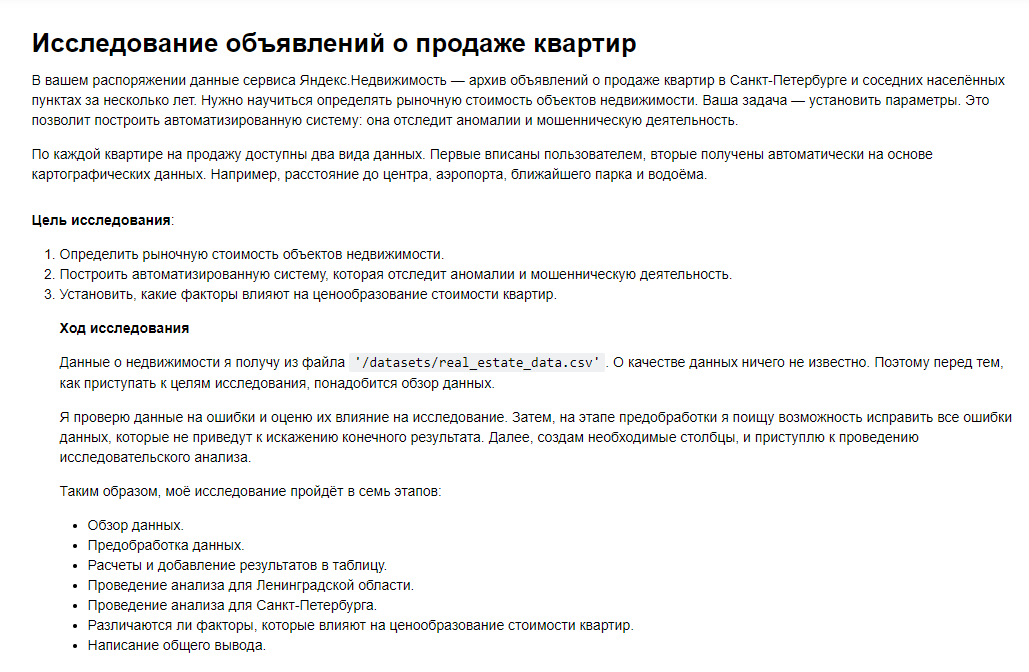
</div>

## Откройте файл с данными и изучите общую информацию. 

### Импорт библиотек и общая информация

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

pd.options.display.float_format = '{:.2f}'.format

data_first = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [2]:
data.info() #получаем общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построение гистограмм

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

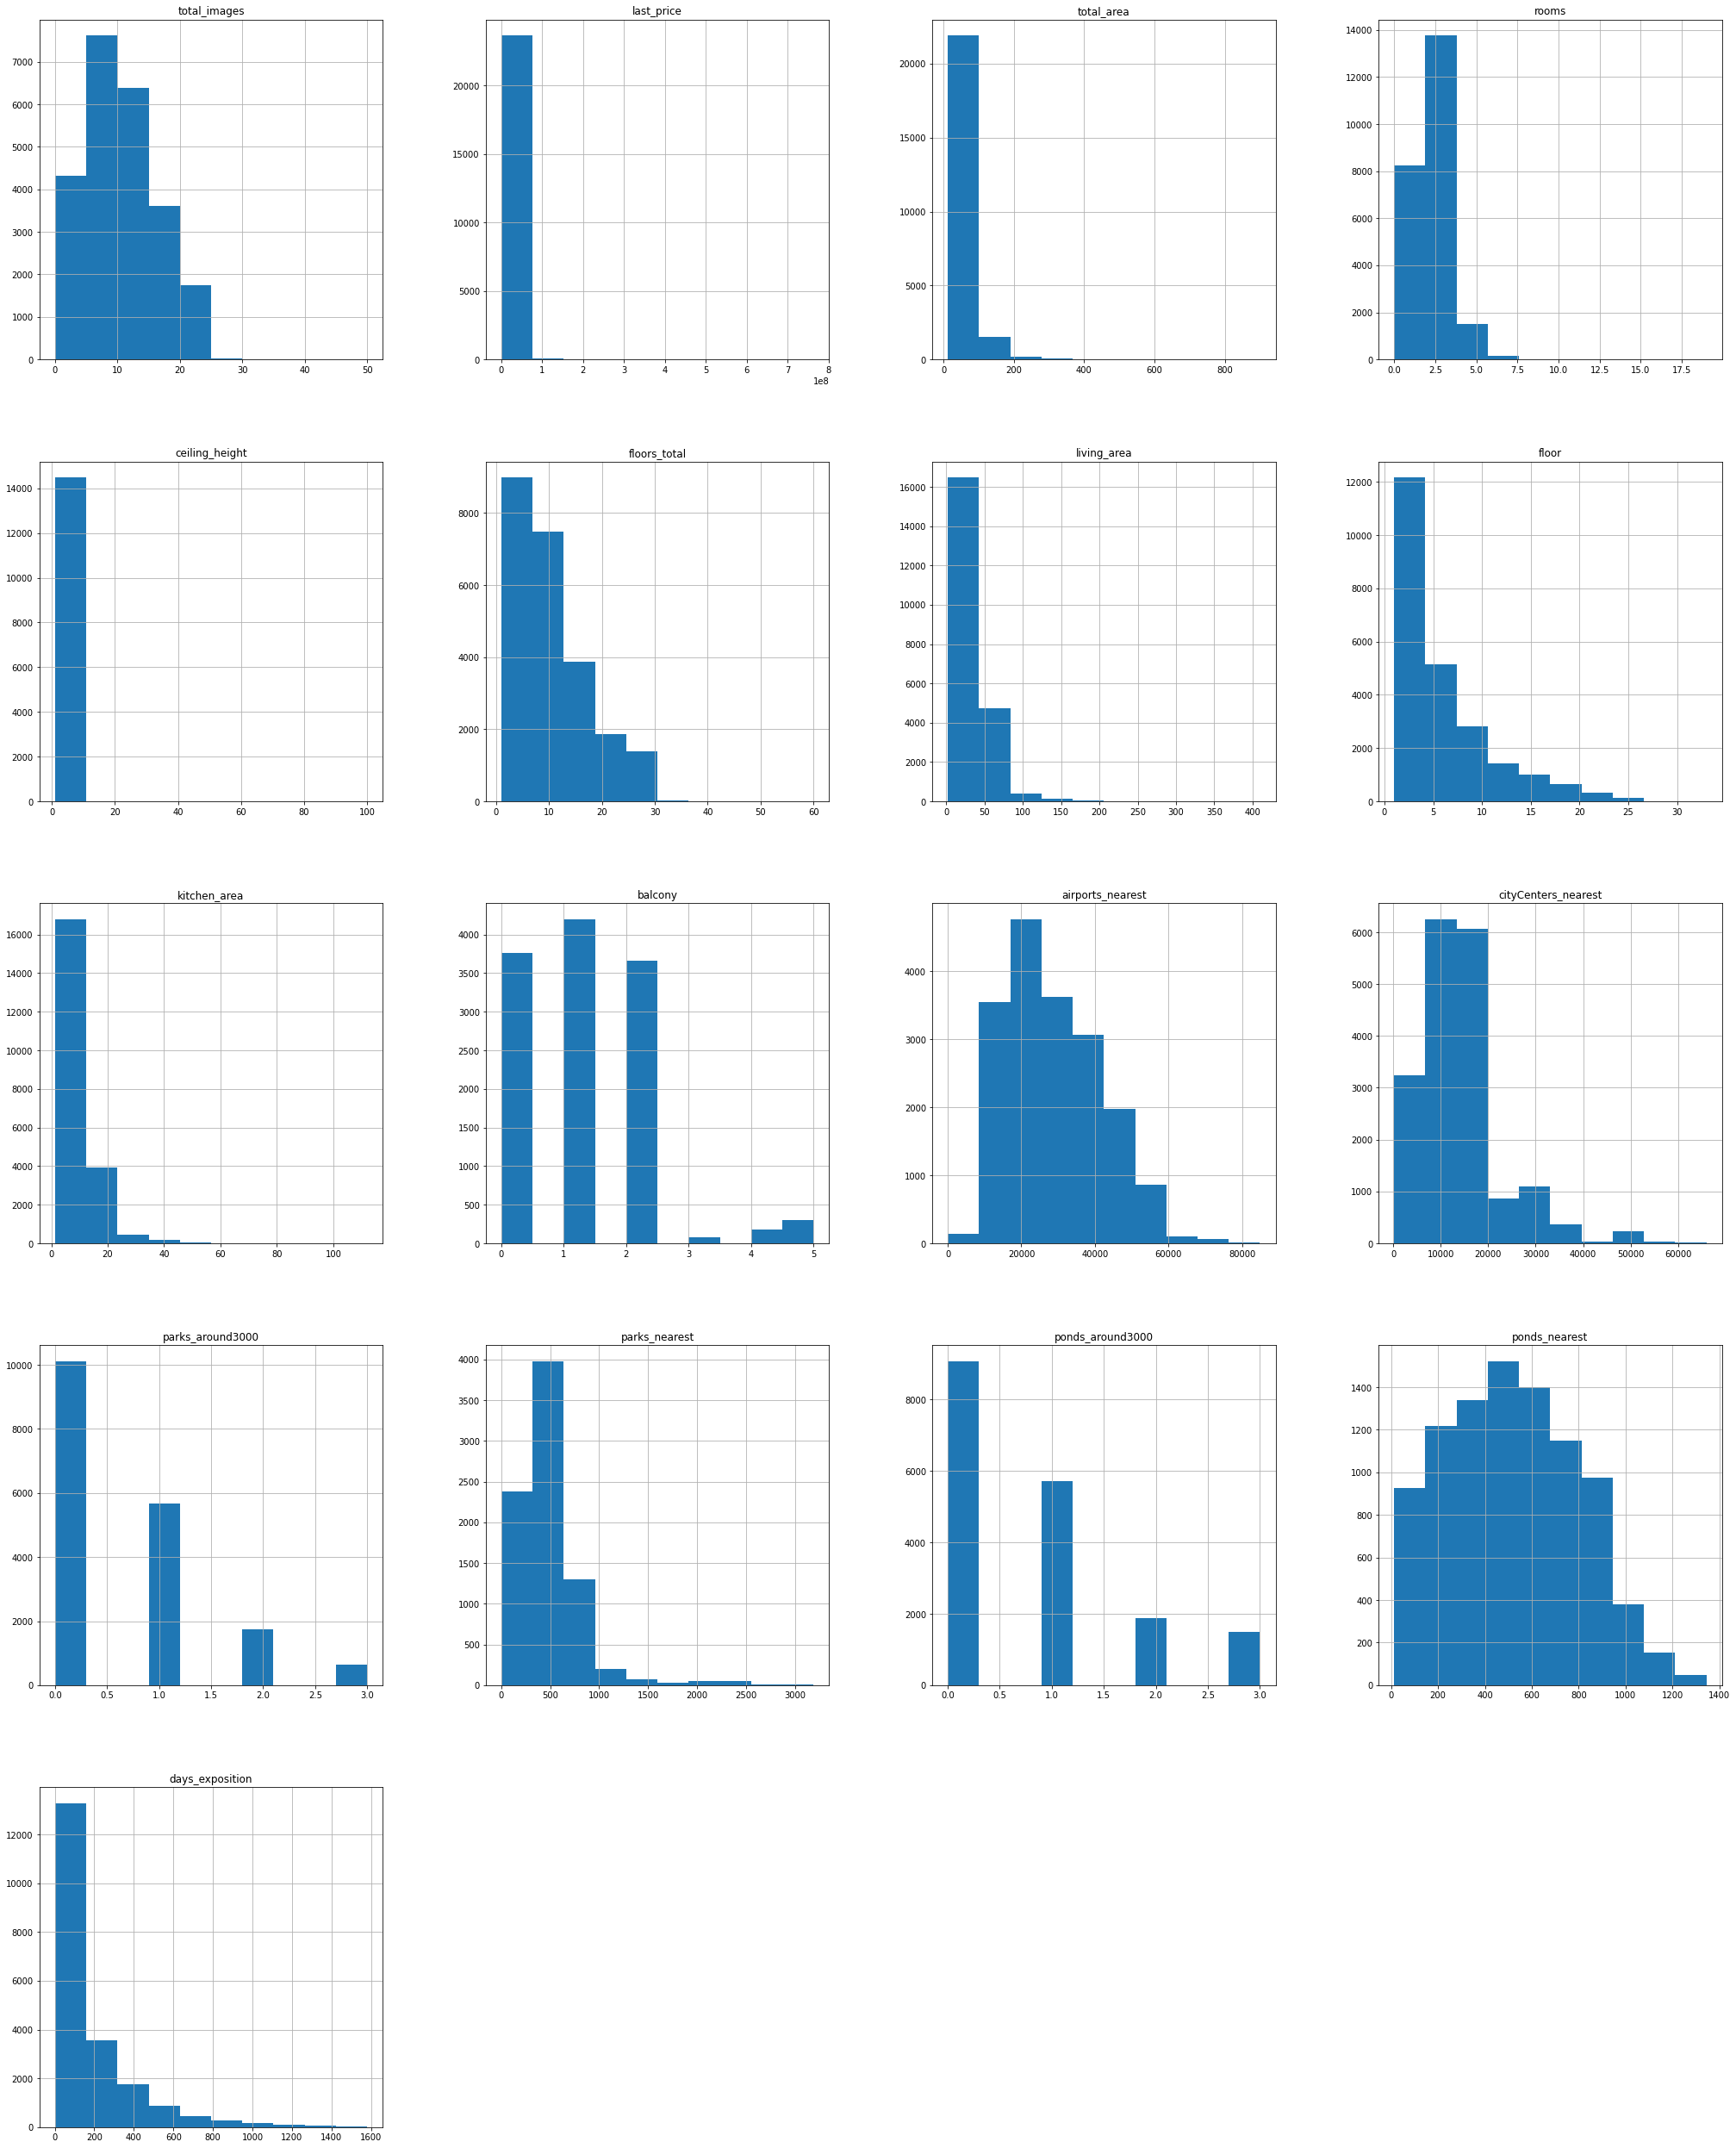

In [3]:
data.hist(figsize=(35, 45))

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
Такие предупреждения можно убрать 2 способами:
    
1. В конец кода добавить `plt.show()`, но для этого нужно вызвать библиотеку `matplotlib.pyplot as plt`
2. В конец кода добавить `;`
    
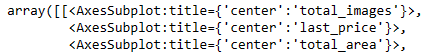
</div>

## Предобработка данных

### Работа с пропусками

#### Общее количество пропусков

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Колонка ceiling_height

Часто люди просто не знают высоту потолков в квартире, оставляем без изменений.

#### Колонка floors_total

Люди могут не считать важным этот параметр, пропусков немного, пока поставим "заглушки".

In [5]:
data['floors_total'] = data['floors_total'].fillna(66666)

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не обязательно заполнять все пропуски. Замена пропусков должна быть или рациональной, или оставить их. И для чего заглушки в колличественных данных?
</div>

<div class="alert alert-info"><b>Комментарии студента:</b>  Заглушки ставлю на всякий случай там, где это уместно без потери смысла, на первоначальном этапе не всегда понятно, как тебе надо будет их использовать. Главное, про них не забывать=)</div>


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Верно. Поэтому с ними нужно быть предельно аккуратно)
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5% их лучше сразу удалить, дабы сэкономить время
</div>

#### Колонка living_area

Скорее всего люди не знают жилую площадь. Есть редкие случаи, когда она совпадает с общей площадью, но это все же исключения, оставляем без изменений.

#### Колонка is_apartment

Можно предположить, что квартиры с пропущенными значениями апартаментами не являются.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].dtypes

dtype('bool')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, ведь это булевый стобец
</div>

#### Колонка kitchen_area

Скорее всего люди часто не знают площадь кухни и не считают это важным, оставляем без изменений.

#### Колонка balcony

Можно предположить, что в квартирах с пропущенными значениями нет балконов.

In [7]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

#### Колонка locality_name

На мой взгляд местоположение является ключевым параметром, предложения без него не представляют ценности, пропусков немного, можно беспрепятственно удалить.

In [8]:
data = data.dropna(subset=['locality_name'])

#### Колонки с расстояниями

Пропуски в колонках airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest пока непонятно чем заполнить, их много, удалить не представляется возможным.

#### Колонка days_exposition

Пропуски обусловлены тем, что объявление еше не снято с публикации. Пока поставим "заглушки".

In [9]:
data['days_exposition'] = data['days_exposition'].fillna(66666)

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Не обязательно заполнять все пропуски. Например в столбце `days_exposition` я бы рекомендовал их оставить, как есть. Т.к. любая замена - это или случайное число или заглушка. Которые исказят результаты исследовательского анализа
</div>

#### Проверяем таблицу на пропуски

In [10]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total                0
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

### Работа с типами данных

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Колонка first_day_exposition 

Колонка с датой публикации, стоит переформатировать в datetime, в этои формате будет удобней извлекать данные для исследования.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Колонка last_price 

При продаже недвижимости копейки не играют никакой роли, даже если они есть, стоит переформатировать в int

In [13]:
data['last_price'] = data['last_price'].astype('int')

#### Колонка floors_total 

Общее количество этажей - целое число, стоит переформатировать в int

In [14]:
data['floors_total'] = data['floors_total'].astype('int')

#### Колонка days_exposition 

Продолжительность публикации в днях - целое число, стоит переформатировать в int

In [15]:
data['days_exposition'] = data['days_exposition'].astype('int')

#### Колонка balcony

Количество балконов - целое число, стоит переформатировать в int

In [16]:
data['balcony'] = data['balcony'].astype('int')

#### Проверка

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Столбцы имеют корректный тип данных

### Работа с дубликатами

#### Проверка на явные дубликаты

In [18]:
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверка на дубликаты - основа предобработки данных

#### Проверка на неявные дубликаты

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
деревня Большой Сабск                1
поселок Коробицыно                   1
поселок Цвылёво                      1
деревня Нижние Осельки               1
посёлок Пансионат Зелёный Бор        1
Name: locality_name, Length: 364, dtype: int64

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
data['locality_name'] = data['locality_name'].str.lower()

In [22]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок имени', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('коттеджный поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
data['locality_name'] = data['locality_name'].replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код

In [23]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [24]:
data['locality_name'].value_counts()

санкт-петербург               15721
поселок мурино                  556
поселок шушары                  440
всеволожск                      398
пушкин                          369
                              ...  
деревня сижно                     1
деревня мануйлово                 1
деревня кисельня                  1
деревня хапо-ое                   1
садовое товарищество рахья        1
Name: locality_name, Length: 319, dtype: int64

### Работа с аномалиями

#### Колонка ceiling_height

In [25]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можно предположить, что в слишком больших значениях пропущена запятая, отделяющая целую часть от дробной.

In [26]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здороов ,что не хардкодишь, а используешь функцию

#### Колонка last_price

Посмотрим описание, минимумы/максимумы, уникальные значения

In [27]:
print(data['last_price'].describe())
data['last_price'].unique()

count       23650.00
mean      6541126.90
std      10896399.18
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64


array([13000000,  3350000,  5196000, ...,  6151120, 21400000, 11475000])

Цена в 12тр выглядит подозрительно, выведем подробную инфориацию

In [28]:
data[data['last_price'] < 300000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,санкт-петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8


Квартира в Питере площадью более 100 кв.м не может так стоить.
Скорее всего ошибка в порядке.
Посмотрим сколько стоят подобные квартиры.

In [29]:
x = data[(data['total_area'] < 120) & (data['total_area'] > 100) & (data['locality_name'] == 'санкт-петербург')]
x['last_price'].median()

12800000.0

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: Рекомендую не смотреть данные "на глаз". Лучше посмотреть на выбросы и аномалии данных математически, и удалить их (если они соответствуют здравому смыслу). В этом поможет метод boxplot()
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Понял, согласен. Просто это значение вылезло в минимумах и уж очень сильно бросилось в глаза</div>


Судя по всему правильная цена - 12190000. Заменим значение в таблице.

In [30]:
data.loc[8793, 'last_price'] = 12190000

In [31]:
data.loc[8793]

total_images                              7
last_price                         12190000
total_area                           109.00
first_day_exposition    2019-03-20 00:00:00
rooms                                     2
ceiling_height                         2.75
floors_total                             25
living_area                           32.00
floor                                    25
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                          40.50
balcony                                   0
locality_name               санкт-петербург
airports_nearest                   36421.00
cityCenters_nearest                 9176.00
parks_around3000                       1.00
parks_nearest                        805.00
ponds_around3000                       0.00
ponds_nearest                           NaN
days_exposition                           8
Name: 8793, dtype: object

Отсеем также супердорогие квартиры, стоимостью свыше 50 млн руб, если их немного

In [32]:
data[data['last_price'] > 50000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424
155,8,96000000,317.00,2017-07-07,4,3.50,3,183.00,3,False,False,False,NaN,1,санкт-петербург,22673.00,1771.00,2.00,508.00,3.00,366.00,62
464,15,66571000,280.30,2015-06-11,6,5.20,8,159.50,7,False,False,False,21.10,0,санкт-петербург,26316.00,6655.00,3.00,187.00,1.00,616.00,578
492,18,95000000,216.00,2017-12-05,4,3.00,5,86.00,4,False,False,False,77.00,0,санкт-петербург,21740.00,436.00,2.00,138.00,3.00,620.00,14
509,5,90000000,225.00,2016-06-26,6,NaN,4,134.00,2,False,False,False,19.50,2,санкт-петербург,32864.00,5720.00,0.00,NaN,2.00,519.00,416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,20,59000000,127.50,2016-12-21,4,3.00,12,85.00,8,False,False,False,13.00,1,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,635
22804,4,81960000,205.00,2017-09-29,4,3.20,9,108.00,3,False,False,False,10.00,0,санкт-петербург,21946.00,2242.00,1.00,679.00,1.00,227.00,169
22831,18,289238400,187.50,2019-03-19,2,3.37,6,63.70,6,False,False,False,30.20,0,санкт-петербург,22494.00,1073.00,3.00,386.00,3.00,188.00,66666
22907,9,65000000,228.00,2016-06-02,4,NaN,5,200.00,2,False,False,False,NaN,0,санкт-петербург,22783.00,1295.00,3.00,619.00,3.00,269.00,66666


In [33]:
data = data[data['last_price'] <= 50000000]
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23519.00,23519.00,23519.00,23519.00,14402.00,23519.00,21637.00,23519.00,21268.00,23519.00,17989.00,18010.00,18011.00,7964.00,18011.00,8975.00,23519.00
mean,9.84,5998476.47,59.22,2.06,2.72,251.59,33.86,5.90,10.44,0.59,28818.32,14266.95,0.60,492.25,0.76,520.09,9093.23
std,5.67,4976658.19,31.08,1.06,0.29,3999.99,19.80,4.89,5.42,0.96,12674.93,8596.51,0.79,342.54,0.93,278.05,22654.42
min,0.00,430000.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.51,5.00,18.60,2.00,7.00,0.00,18539.00,9403.00,0.00,288.00,0.00,296.00,45.00
50%,9.00,4600000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,0.00,26771.00,13149.00,0.00,456.00,0.00,503.00,123.00
75%,14.00,6700000.00,69.00,3.00,2.80,16.00,42.00,8.00,12.00,1.00,37364.00,16318.00,1.00,613.00,1.00,733.00,388.00
max,50.00,50000000.00,517.00,19.00,10.00,66666.00,332.00,33.00,100.70,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,66666.00


Квартир дороже 50 млн руб, их можно отсеять, они могут повлиять на результат анализа.

#### Колонка total_area

In [34]:
print(data['total_area'].describe())
data['total_area'].unique()

count   23519.00
mean       59.22
std        31.08
min        12.00
25%        40.00
50%        52.00
75%        69.00
max       517.00
Name: total_area, dtype: float64


array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

Вероятно, слишком большие и слишком маленькие квартиры являются выбросами.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

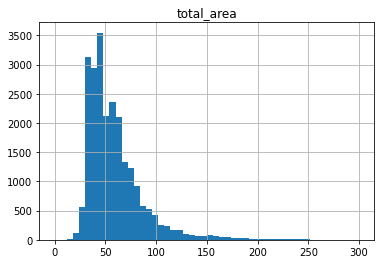

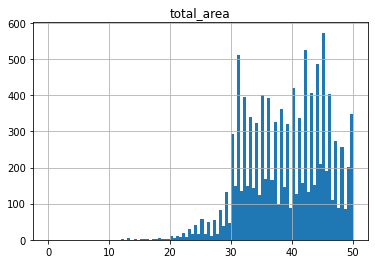

In [35]:
data.hist('total_area', range=(0, 300), bins=50)
data.hist('total_area', range=(0, 50), bins=100)

In [36]:
data[(data['total_area'] > 200) | (data['total_area'] < 20)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
521,20,25717300,230.10,2015-01-21,3,NaN,3,130.00,1,False,False,False,26.10,1,пушкин,16877.00,29030.00,2.00,676.00,3.00,278.00,1441
660,3,49950000,483.90,2017-10-04,7,3.20,6,312.50,4,False,False,False,26.40,0,санкт-петербург,23079.00,945.00,3.00,461.00,3.00,22.00,391
681,20,24900000,249.00,2015-08-13,7,NaN,5,180.00,4,False,False,False,NaN,1,санкт-петербург,24810.00,6108.00,0.00,NaN,0.00,NaN,781
716,5,1500000,17.00,2017-06-07,0,2.70,9,12.00,1,False,True,False,NaN,0,поселок шушары,18654.00,29846.00,0.00,NaN,0.00,NaN,40
813,7,16500000,229.00,2016-02-25,8,NaN,6,160.00,5,False,False,False,25.00,0,санкт-петербург,23968.00,4536.00,1.00,243.00,0.00,NaN,806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,3,1900000,18.90,2016-04-04,1,NaN,16,16.00,12,False,False,False,NaN,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,115
23281,20,24800000,231.20,2015-01-21,6,3.10,5,99.80,4,False,False,False,27.40,0,санкт-петербург,21480.00,2453.00,3.00,75.00,1.00,795.00,66666
23327,19,34400000,215.00,2019-03-15,5,2.75,4,82.40,4,False,False,False,40.10,0,санкт-петербург,37268.00,15419.00,0.00,NaN,0.00,NaN,66666
23400,17,30000000,213.00,2017-09-28,7,3.40,5,151.40,5,False,False,False,30.80,0,санкт-петербург,21146.00,1225.00,2.00,342.00,3.00,30.00,299


Квартир свыше 250 кв.м и меньше 20 кв.м всего 173, их можно отсеять, они могут повлиять на результат анализа.

In [37]:
data = data.loc[((data['total_area'] < 250) & (data['total_area'] > 20))]
data['total_area'].describe()

count   23424.00
mean       58.61
std        27.88
min        20.10
25%        40.00
50%        52.00
75%        69.00
max       249.90
Name: total_area, dtype: float64

#### Колонка rooms

In [38]:
print(data['rooms'].describe())
data['rooms'].unique()

count   23424.00
mean        2.05
std         1.02
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        14.00
Name: rooms, dtype: float64


array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8,  9, 10, 14])

Вероятно, квартиры c большим количеством комнат являются выбросами. Если их не очень много, лучше их отсеять.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

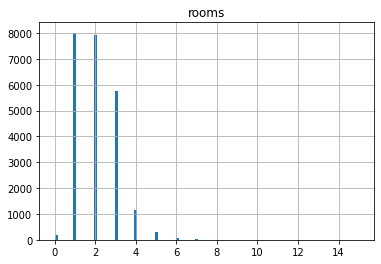

In [39]:
data.hist('rooms', range=(0, 15), bins=100)

In [40]:
data[data['rooms'] > 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
52,20,11795000,136.00,2017-09-22,6,3.00,2,94.00,2,False,False,False,11.00,1,санкт-петербург,16510.00,6582.00,1.00,526.00,0.00,NaN,66666
201,5,10880000,123.10,2015-11-12,6,3.20,5,89.00,2,False,False,False,11.00,0,санкт-петербург,26009.00,3369.00,2.00,516.00,0.00,NaN,992
648,3,17500000,183.70,2018-07-01,11,3.40,7,138.80,7,False,False,False,13.30,0,санкт-петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,66666
681,20,24900000,249.00,2015-08-13,7,NaN,5,180.00,4,False,False,False,NaN,1,санкт-петербург,24810.00,6108.00,0.00,NaN,0.00,NaN,781
750,9,29500000,188.80,2017-03-04,7,2.70,2,119.30,1,False,False,False,10.20,0,санкт-петербург,20965.00,814.00,0.00,NaN,2.00,267.00,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23281,20,24800000,231.20,2015-01-21,6,3.10,5,99.80,4,False,False,False,27.40,0,санкт-петербург,21480.00,2453.00,3.00,75.00,1.00,795.00,66666
23395,4,40000000,188.00,2017-05-29,6,NaN,6,109.51,4,False,False,False,31.30,0,санкт-петербург,23390.00,2254.00,2.00,425.00,1.00,62.00,30
23400,17,30000000,213.00,2017-09-28,7,3.40,5,151.40,5,False,False,False,30.80,0,санкт-петербург,21146.00,1225.00,2.00,342.00,3.00,30.00,299
23448,3,14700000,180.00,2018-02-08,6,3.00,6,126.00,5,False,False,False,20.00,0,санкт-петербург,23955.00,5089.00,0.00,NaN,2.00,616.00,66666


Квартир, в которых больше 5 комнат, 134, их можно отсеять, они могут повлиять на результат анализа.

In [41]:
data = data.loc[(data['rooms'] <= 5)]
data['rooms'].describe()##### Колонка rooms

count   23296.00
mean        2.02
std         0.96
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64

#### Колонка living_area

In [42]:
print(data['living_area'].describe())
data['living_area'].unique()

count   21441.00
mean       33.05
std        17.04
min         2.00
25%        18.60
50%        30.00
75%        42.00
max       175.00
Name: living_area, dtype: float64


array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

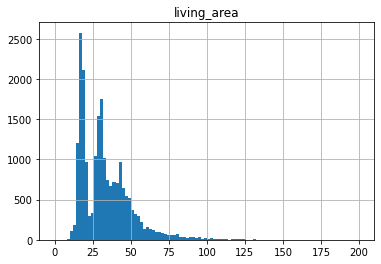

In [43]:
data.hist('living_area', range=(0, 200), bins=100)

Отсеиваить ничего по жилой площади не будем, потому что далеко не всегда ее указывают корректно, а очевидных аномалий нет

#### Колонка floor

In [44]:
print(data['floor'].describe())
data['floor'].unique()

count   23296.00
mean        5.91
std         4.90
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64


array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

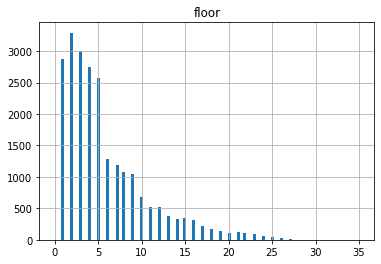

In [45]:
data.hist('floor', range=(0, 35), bins=100)

Отсеиваить ничего по этажам не будем, очевидных аномалий нет

#### Колонка kitchen_area

In [46]:
print(data['kitchen_area'].describe())
data['kitchen_area'].unique()

count   21093.00
mean       10.35
std         5.24
min         1.30
25%         7.00
50%         9.00
75%        11.90
max        75.00
Name: kitchen_area, dtype: float64


array([25.  , 11.  ,  8.3 , 41.  ,  9.1 , 14.4 , 18.9 ,  8.81,  6.5 ,
        8.5 ,  6.  ,  9.  ,  5.2 ,  8.  ,  7.6 ,  5.6 , 12.  ,  5.7 ,
        6.1 , 19.6 , 15.  ,  7.  ,  9.2 , 11.7 ,   nan, 13.4 , 17.  ,
        6.3 , 11.6 ,  8.8 , 10.  , 17.6 ,  7.5 ,  9.5 , 50.  , 15.5 ,
       10.7 , 11.1 , 20.  , 11.9 , 16.  ,  5.3 , 11.5 ,  7.2 ,  6.2 ,
       10.4 ,  7.1 ,  4.9 ,  7.3 , 11.95, 10.2 ,  6.4 ,  5.5 , 13.  ,
        8.4 , 23.6 , 10.8 , 18.3 ,  5.  ,  8.2 , 24.  , 23.8 ,  6.6 ,
       26.85, 15.4 ,  7.8 , 33.8 ,  5.4 , 12.72, 12.2 , 19.  , 12.4 ,
        7.9 , 10.3 ,  9.8 , 17.5 , 14.7 , 20.91, 21.3 , 10.6 , 10.9 ,
        9.7 ,  7.7 , 12.5 , 11.4 ,  8.6 , 11.24, 14.1 , 15.7 , 13.29,
       14.  , 12.9 , 12.7 , 16.5 ,  9.36, 21.5 , 35.  , 10.5 ,  8.7 ,
       19.3 , 21.4 , 40.  , 49.2 , 11.52,  8.9 ,  9.6 , 30.  , 14.2 ,
        8.1 , 10.44,  4.5 , 16.3 , 11.2 , 18.4 ,  7.4 , 11.3 ,  9.4 ,
       13.1 , 10.19,  7.06, 22.  , 36.  ,  5.1 , 18.7 ,  9.9 , 14.3 ,
       18.  , 23.  ,

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

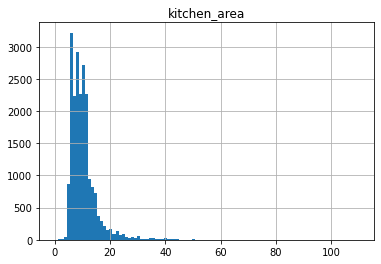

In [47]:
data.hist('kitchen_area', range=(0, 110), bins=100)

Тоже самое, что с жилой площадью, очевидных аномалий нет, отсеиваить ничего не будем

#### Колонка balcony

In [48]:
print(data['balcony'].describe())
data['balcony'].unique()

count   23296.00
mean        0.60
std         0.96
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: balcony, dtype: float64


array([0, 2, 1, 5, 4, 3])

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

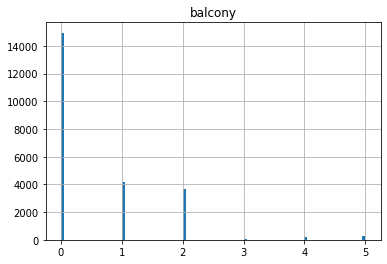

In [49]:
data.hist('balcony', range=(0, 5), bins=100)

Визуально больше аномалий не видно, столбцы days_exposition, floors_total с "заглушками".

In [50]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23296.00,23296.00,23296.00,23296.00,14257.00,23296.00,21441.00,23296.00,21093.00,23296.00,17779.00,17800.00,17801.00,7830.00,17801.00,8839.00,23296.00
mean,9.85,5871289.68,57.95,2.02,2.72,248.22,33.05,5.91,10.35,0.60,28861.30,14351.47,0.60,493.36,0.76,521.40,9018.31
std,5.66,4689749.93,26.36,0.96,0.29,3971.62,17.04,4.90,5.24,0.96,12714.56,8582.05,0.79,344.08,0.93,277.76,22574.31
min,0.00,430000.00,20.10,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.50,5.00,18.60,2.00,7.00,0.00,18488.00,9550.75,0.00,288.00,0.00,298.00,45.00
50%,9.00,4600000.00,51.60,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26902.00,13205.00,0.00,456.00,0.00,505.00,123.00
75%,14.00,6650000.00,68.33,3.00,2.80,16.00,42.00,8.00,11.90,1.00,37407.00,16379.50,1.00,614.00,1.00,733.00,385.00
max,50.00,50000000.00,245.80,5.00,10.00,66666.00,175.00,33.00,75.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,66666.00


#### Вывод

В изначальных данных наблюдались пропуски, связанные с человеческим фактором (люди не все поля считают важными и необходимыми для заполнения, а также не все данные им известны), пропуски равные 0 (в случае с булевым типом данных), неявные дубликаты в колонке locality_name, неудобный для работы тип данных, аномалии и выбросы в некоторых колонках. 

Основной массив данных целостный. Критических замечаний нет.

После проведения предобработки осталось 23296 строки из 23699, вполне достаточно для проведения полноценного анализа.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Поправил </div>


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

## Добавляем в таблицу новые столбцы

### Добавляем столбец "Цена за кв.м"

In [51]:
data['price_1m2'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.79


### Добавляем столбец "День недели"

In [52]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.79,0


### Добавляем столбец "Месяц"

In [53]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.79,0,9


### Добавляем столбец "Год"

In [54]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Принято, спасибо! </div>


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

### Добавляем столбец "Тип этажа"

In [55]:
def type_stage(row):
    stages = row['floor']
    hstages = row['floors_total']
    if stages == 1:
        return 'первый'
    elif 1 < stages < hstages:
        return 'другой'    
    elif stages == hstages:
        return 'последний'
data['category_stage'] = data.apply(type_stage, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year,category_stage
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,другой


### Добавляем столбец "Расстояние до центра в км"

In [56]:
data['cityCenters_nearest'].describe()

count   17800.00
mean    14351.47
std      8582.05
min       181.00
25%      9550.75
50%     13205.00
75%     16379.50
max     65968.00
Name: cityCenters_nearest, dtype: float64

Поставим 'заглушки' для пропущенных значений столбца cityCenters_nearest

In [57]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

Переведем значения в км, округлим и сразу переведем в int

In [58]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0).astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year,category_stage,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,другой,14
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,0.00,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,другой,0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

## Проведите исследовательский анализ данных

### Изучаем параметры

#### Общая площадь

In [59]:
data['total_area'].describe()

count   23296.00
mean       57.95
std        26.36
min        20.10
25%        40.00
50%        51.60
75%        68.33
max       245.80
Name: total_area, dtype: float64

<AxesSubplot:>

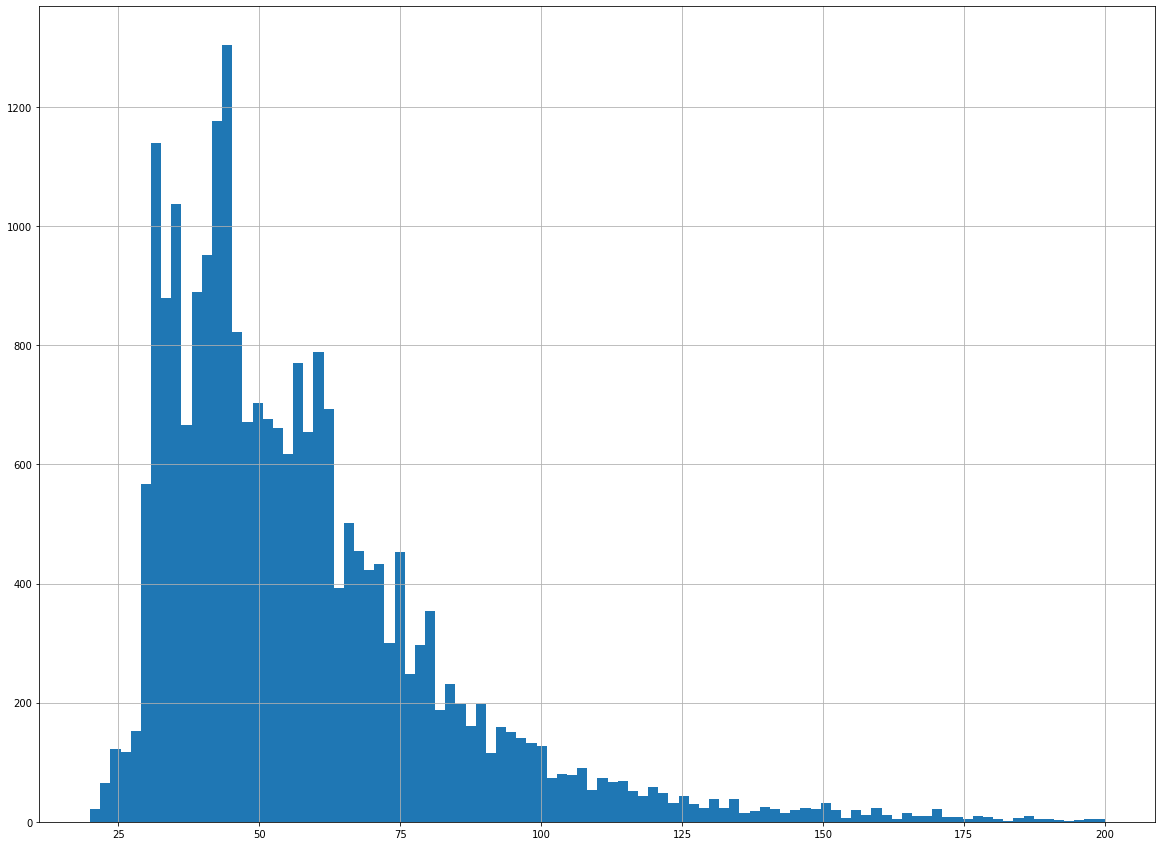

In [60]:
data['total_area'].hist(range = (20, 200), bins=100, figsize = (20, 15)) #строим гистограммы

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что используешь метод range() для определения пиковых значений
</div>

Основное количество квартир имеет площадь в диапазоне от 30 до 60 м2

#### Жилая площадь

In [61]:
data['living_area'].describe()

count   21441.00
mean       33.05
std        17.04
min         2.00
25%        18.60
50%        30.00
75%        42.00
max       175.00
Name: living_area, dtype: float64

<AxesSubplot:>

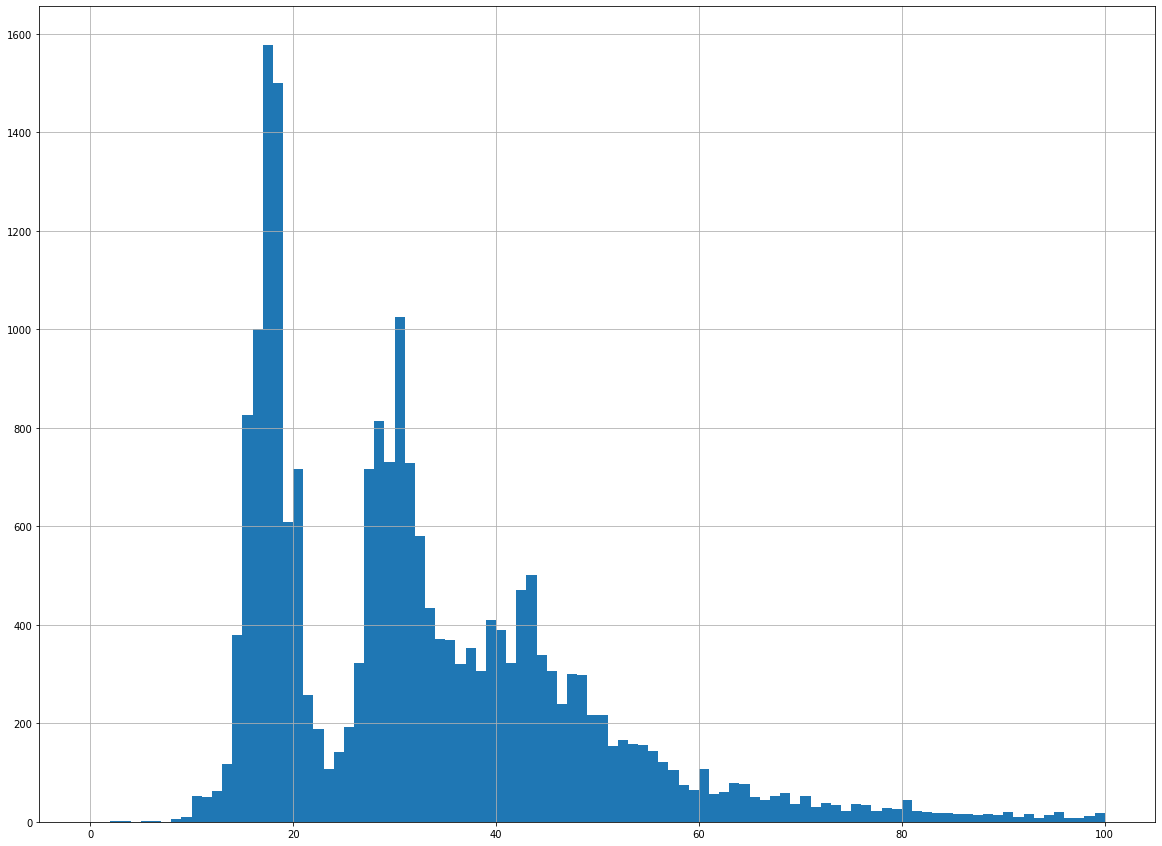

In [62]:
data['living_area'].hist(range = (0, 100), bins=100, figsize = (20, 15)) #строим гистограммы

#### Площадь кухни

In [63]:
data['kitchen_area'].describe()

count   21093.00
mean       10.35
std         5.24
min         1.30
25%         7.00
50%         9.00
75%        11.90
max        75.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

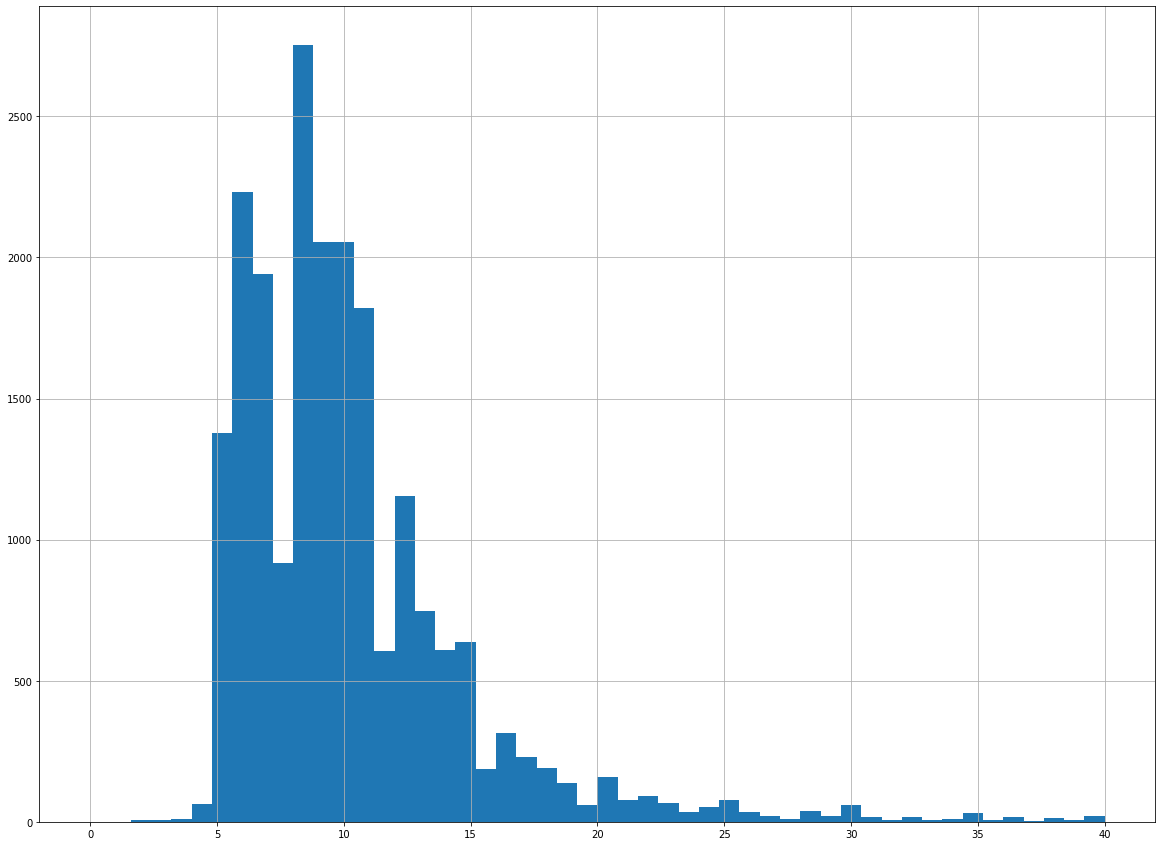

In [64]:
data['kitchen_area'].hist(range = (0, 40), bins=50, figsize = (20, 15)) #строим гистограммы

#### Цена

In [65]:
data['last_price'].describe()

count      23296.00
mean     5871289.68
std      4689749.93
min       430000.00
25%      3400000.00
50%      4600000.00
75%      6650000.00
max     50000000.00
Name: last_price, dtype: float64

<AxesSubplot:>

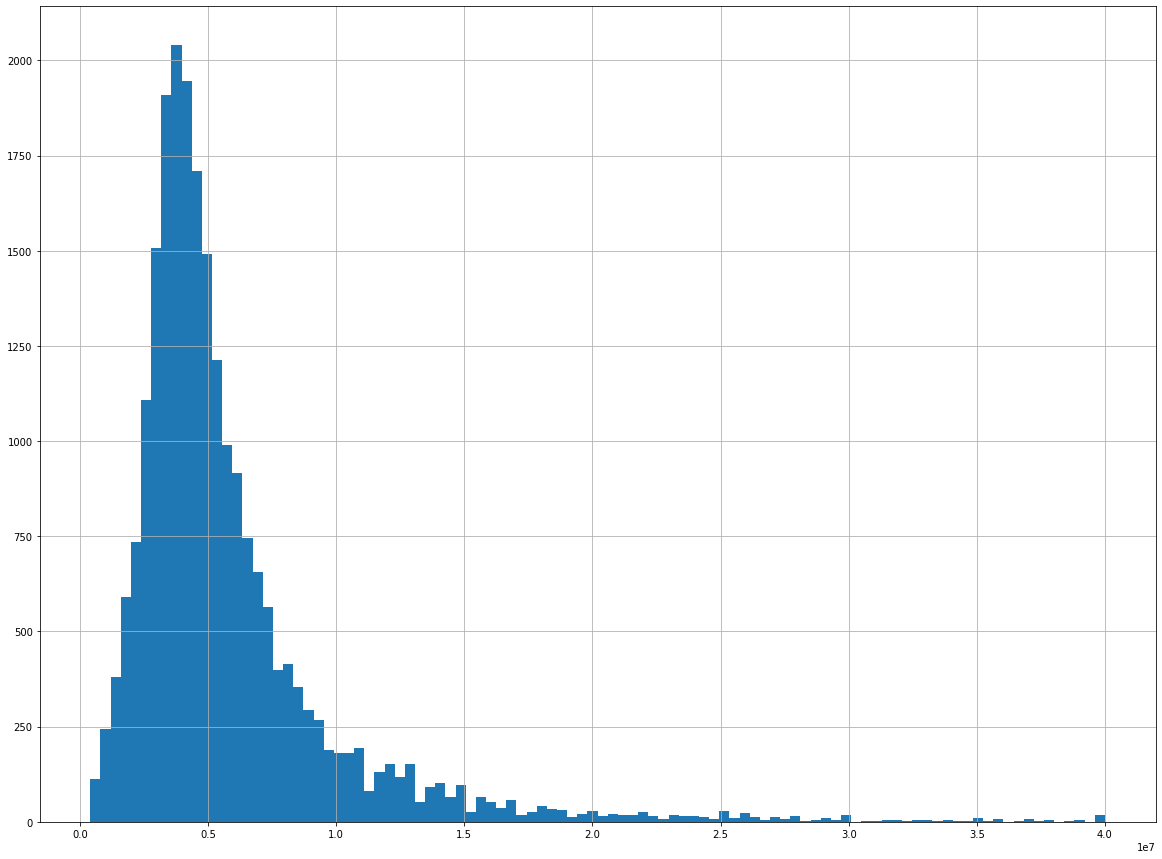

In [66]:
data['last_price'].hist(range = (400000, 40000000), bins=100, figsize = (20, 15)) #строим гистограммы

#### Количество комнат

In [67]:
data['rooms'].describe()

count   23296.00
mean        2.02
std         0.96
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64

<AxesSubplot:>

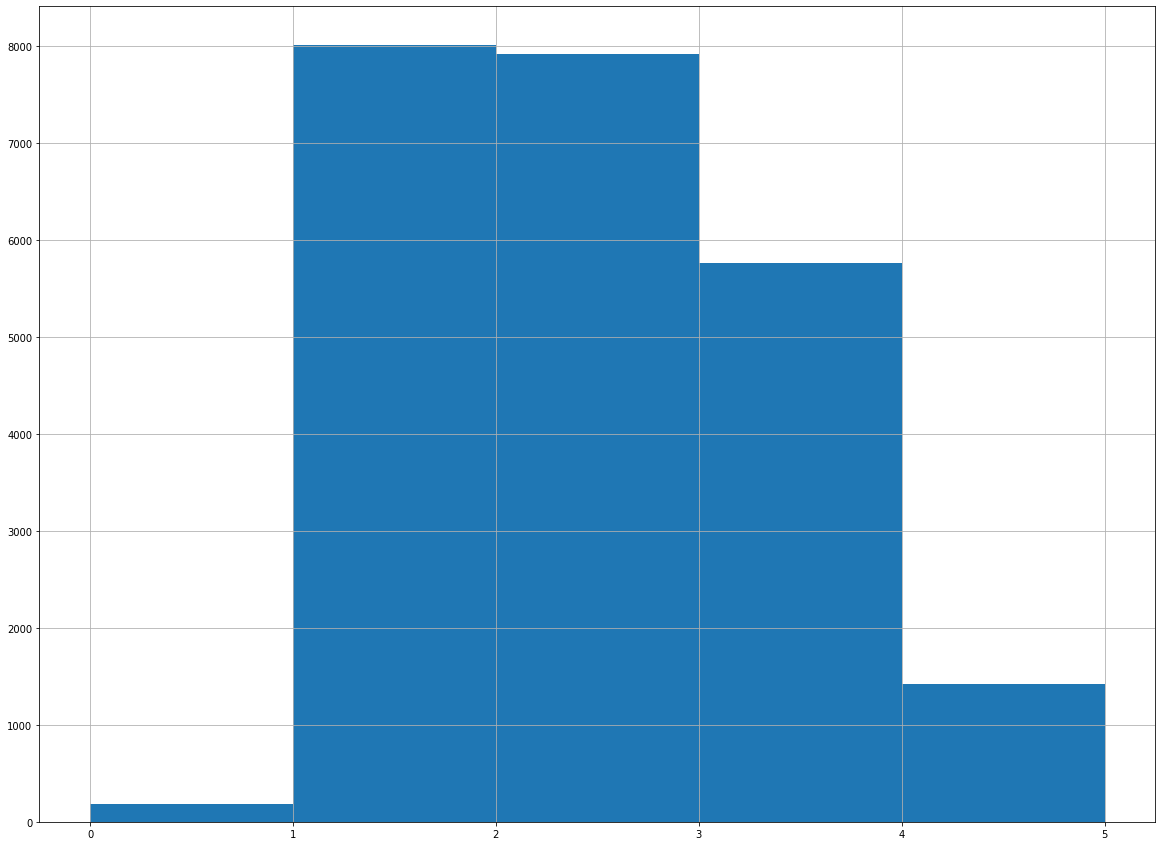

In [68]:
data['rooms'].hist(range = (0, 5), bins=5, figsize = (20, 15)) #строим гистограммы

#### Высота потолков

In [69]:
data['ceiling_height'].describe()

count   14257.00
mean        2.72
std         0.29
min         1.00
25%         2.50
50%         2.65
75%         2.80
max        10.00
Name: ceiling_height, dtype: float64

<AxesSubplot:>

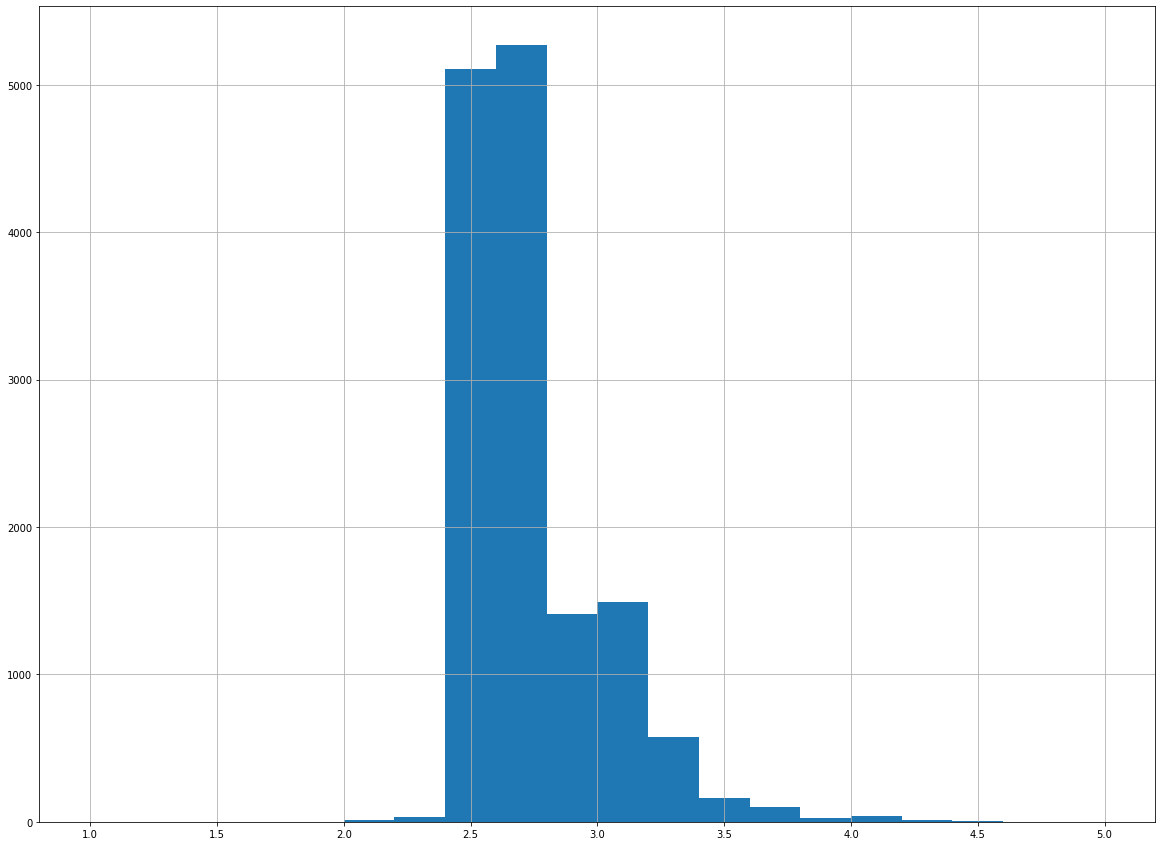

In [70]:
data['ceiling_height'].hist(range = (1, 5), bins=20, figsize = (20, 15)) #строим гистограммы

#### Этаж

In [71]:
data['floor'].describe()

count   23296.00
mean        5.91
std         4.90
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

<AxesSubplot:>

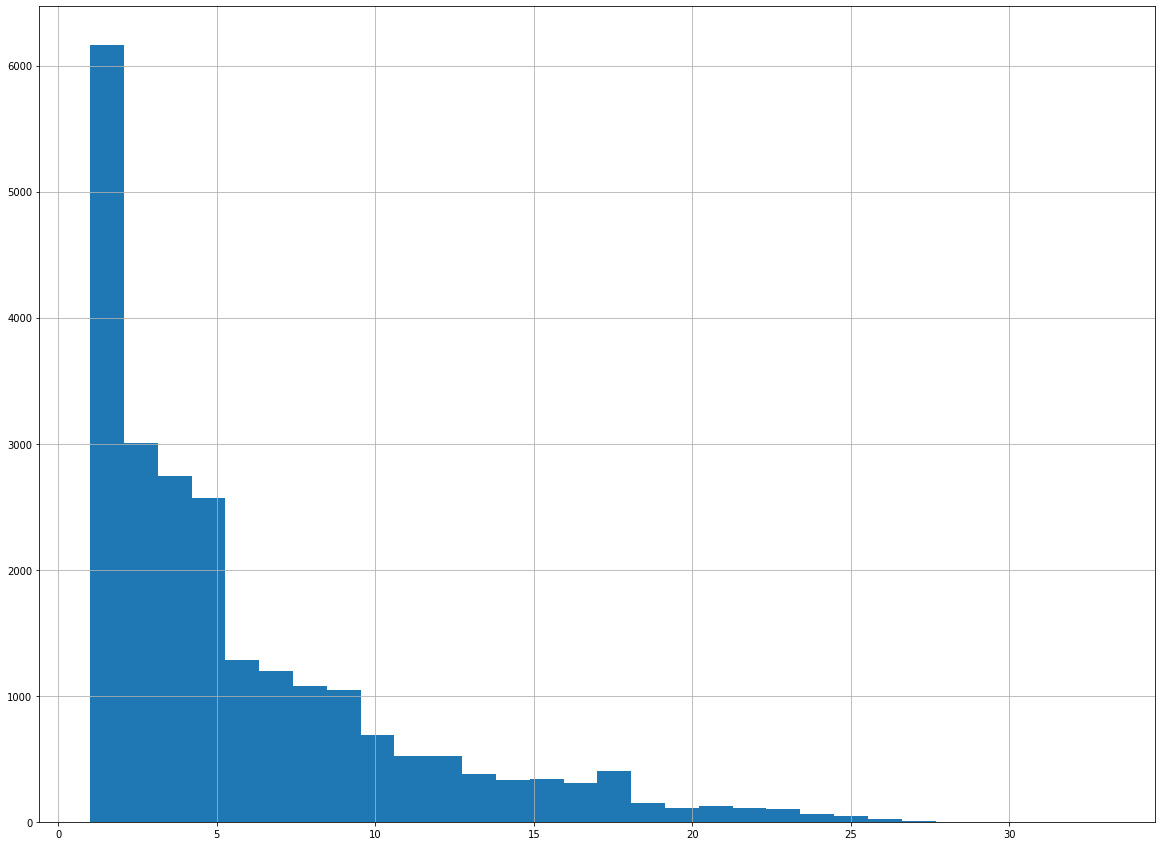

In [72]:
data['floor'].hist(range = (1, 33), bins=30, figsize = (20, 15)) #строим гистограммы

Подавляющее большинство объявлений с квартирами ниже 5 этажа

#### Тип этажа

In [73]:
data['category_stage'].describe()

count      23296
unique         3
top       другой
freq       17184
Name: category_stage, dtype: object

<AxesSubplot:>

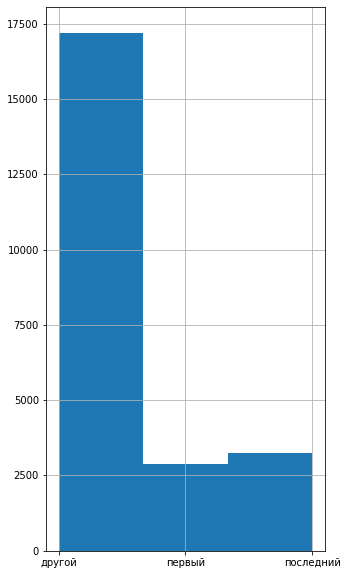

In [74]:
data['category_stage'].hist(bins=3, figsize = (5, 10)) #строим гистограммы

<AxesSubplot:ylabel='category_stage'>

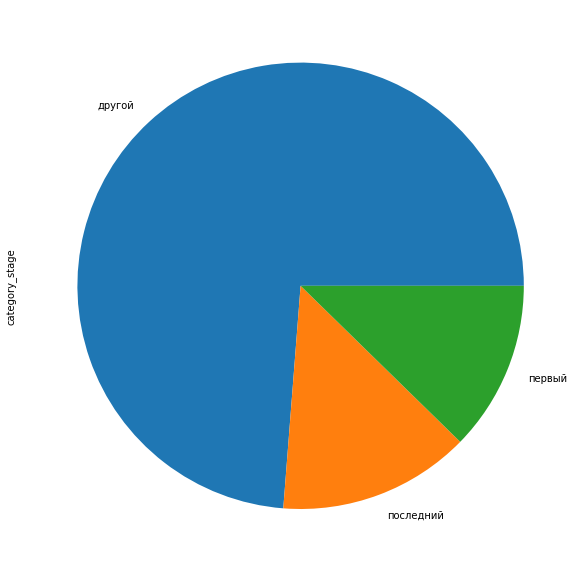

In [75]:
data['category_stage'].value_counts().plot(kind='pie', figsize = (10, 15)) #строим гистограммы

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Полученные данные соответствуют реалиям
</div>

#### Общее количество этажей

In [76]:
data['floors_total'].describe()

count   23296.00
mean      248.22
std      3971.62
min         1.00
25%         5.00
50%         9.00
75%        16.00
max     66666.00
Name: floors_total, dtype: float64

<AxesSubplot:>

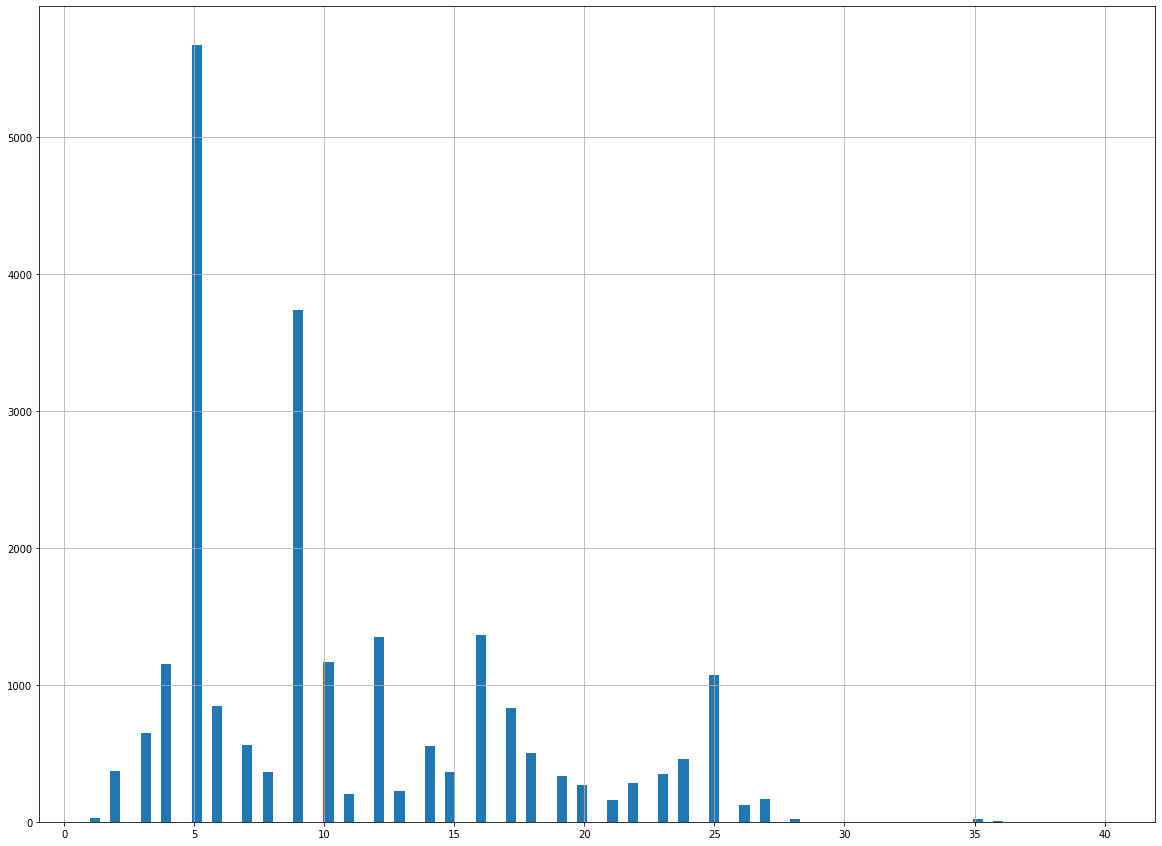

In [77]:
data['floors_total'].hist(range = (1, 40), bins=100, figsize = (20, 15)) #строим гистограммы

Больше всего предложений в питерских 5-этажках, на втором месте 9-этажки, домов этажностью выше 27 практически нет.

#### Расстояние до центра города

In [78]:
data['cityCenters_nearest'].describe()

count   23296.00
mean    10965.67
std      9664.58
min         0.00
25%      2152.00
50%     11360.00
75%     15319.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

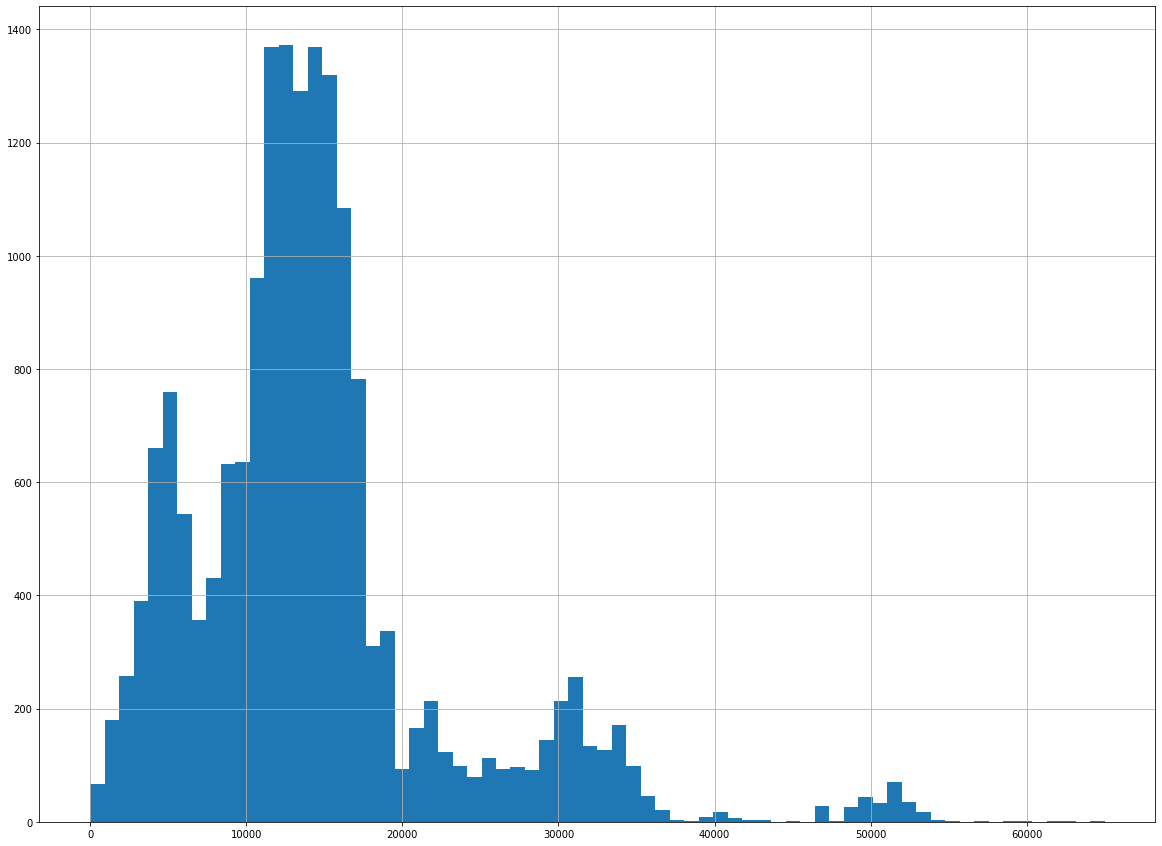

In [79]:
data['cityCenters_nearest'].hist(range = (1, 65000), bins=70, figsize = (20, 15)) #строим гистограммы
#Здесь стоят заглушки на 0, гистограмму строим, начиная с 1

Большая часть квартир удалена от центра на 10-17 км, помним про заглушки.

#### Расстояние до ближайшего аэропорта

In [80]:
data['airports_nearest'].describe()

count   17779.00
mean    28861.30
std     12714.56
min         0.00
25%     18488.00
50%     26902.00
75%     37407.00
max     84869.00
Name: airports_nearest, dtype: float64

<AxesSubplot:>

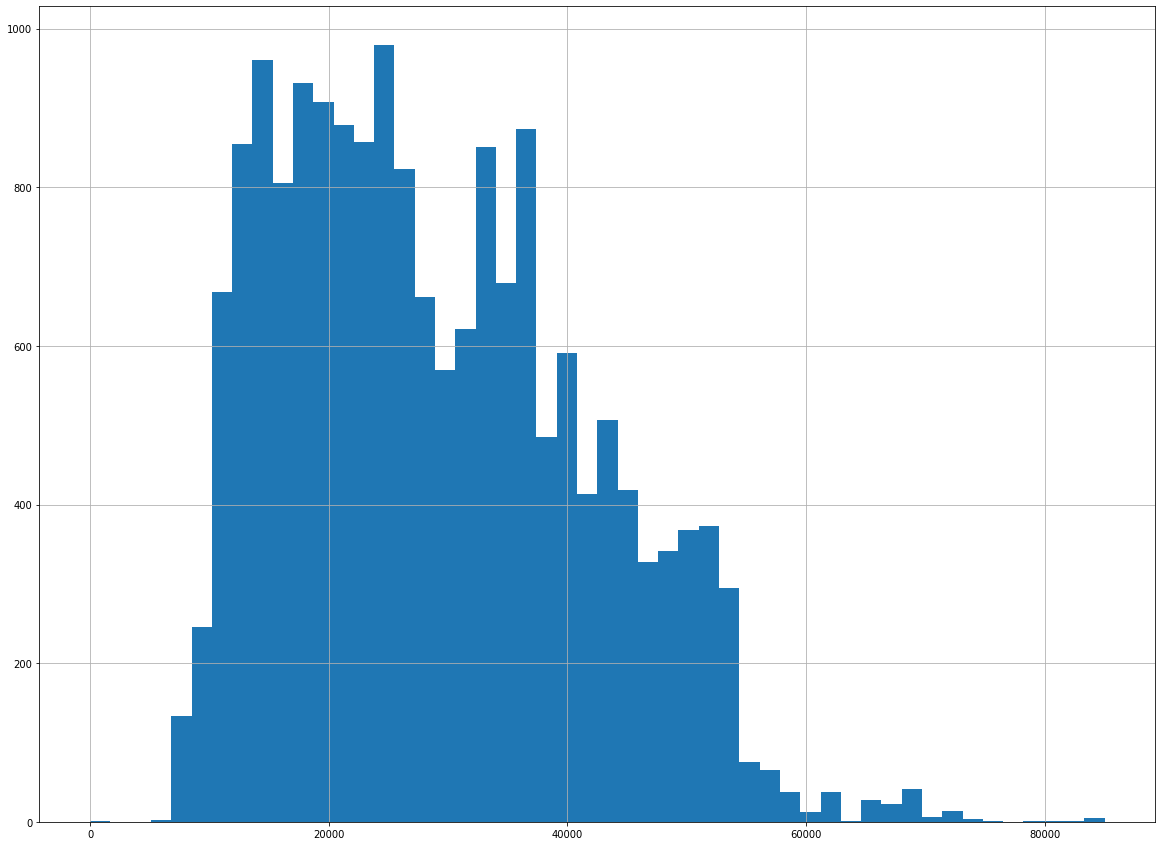

In [81]:
data['airports_nearest'].hist(range = (0, 85000), bins=50, figsize = (20, 15)) #строим гистограммы

#### Расстояние до ближайшего парка

In [82]:
data['parks_nearest'].describe()

count   7830.00
mean     493.36
std      344.08
min        1.00
25%      288.00
50%      456.00
75%      614.00
max     3190.00
Name: parks_nearest, dtype: float64

<AxesSubplot:>

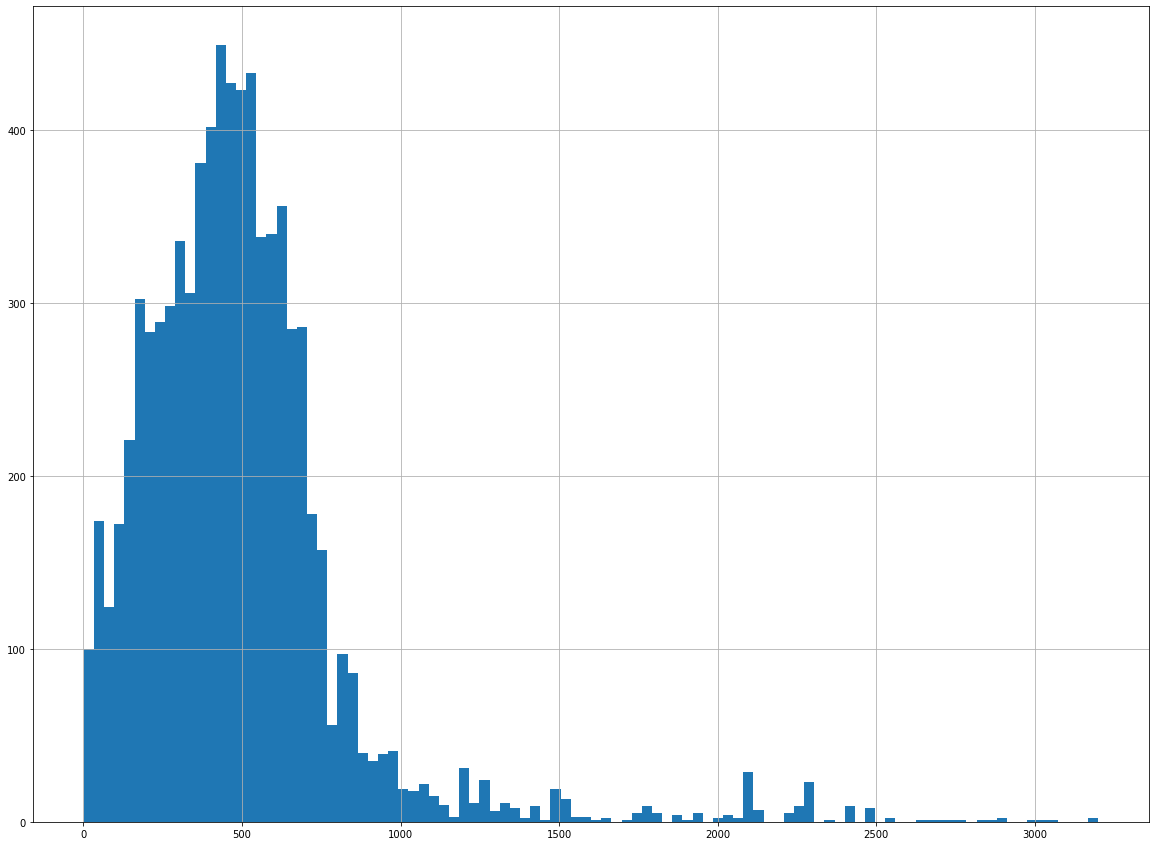

In [83]:
data['parks_nearest'].hist(range = (1, 3200), bins=100, figsize = (20, 15)) #строим гистограммы

#### День и месяц публикации объявления

In [84]:
data['weekday'].describe()

count   23296.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday, dtype: float64

<AxesSubplot:>

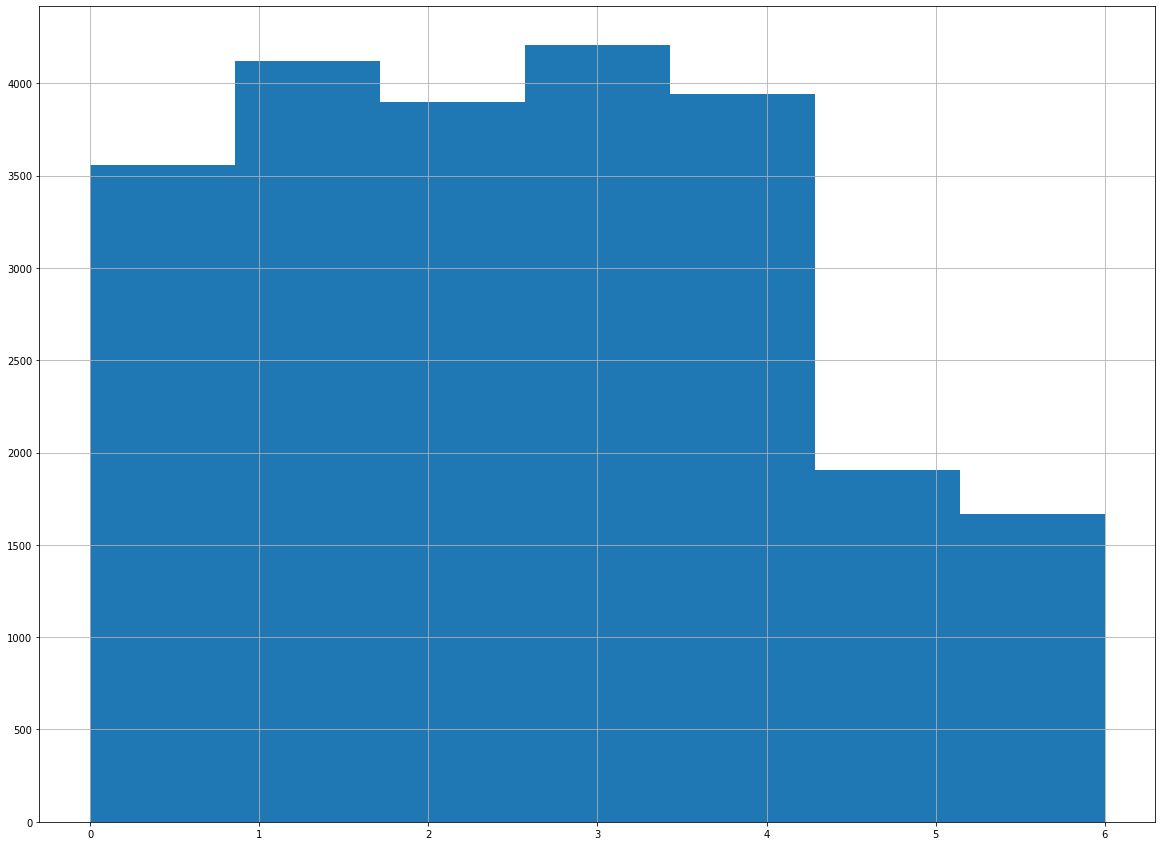

In [85]:
data['weekday'].hist(range = (0, 6), bins=7, figsize = (20, 15)) #строим гистограммы

По будням объявления размещаются чаще, чем по выходным

In [86]:
data['month'].describe()

count   23296.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month, dtype: float64

<AxesSubplot:>

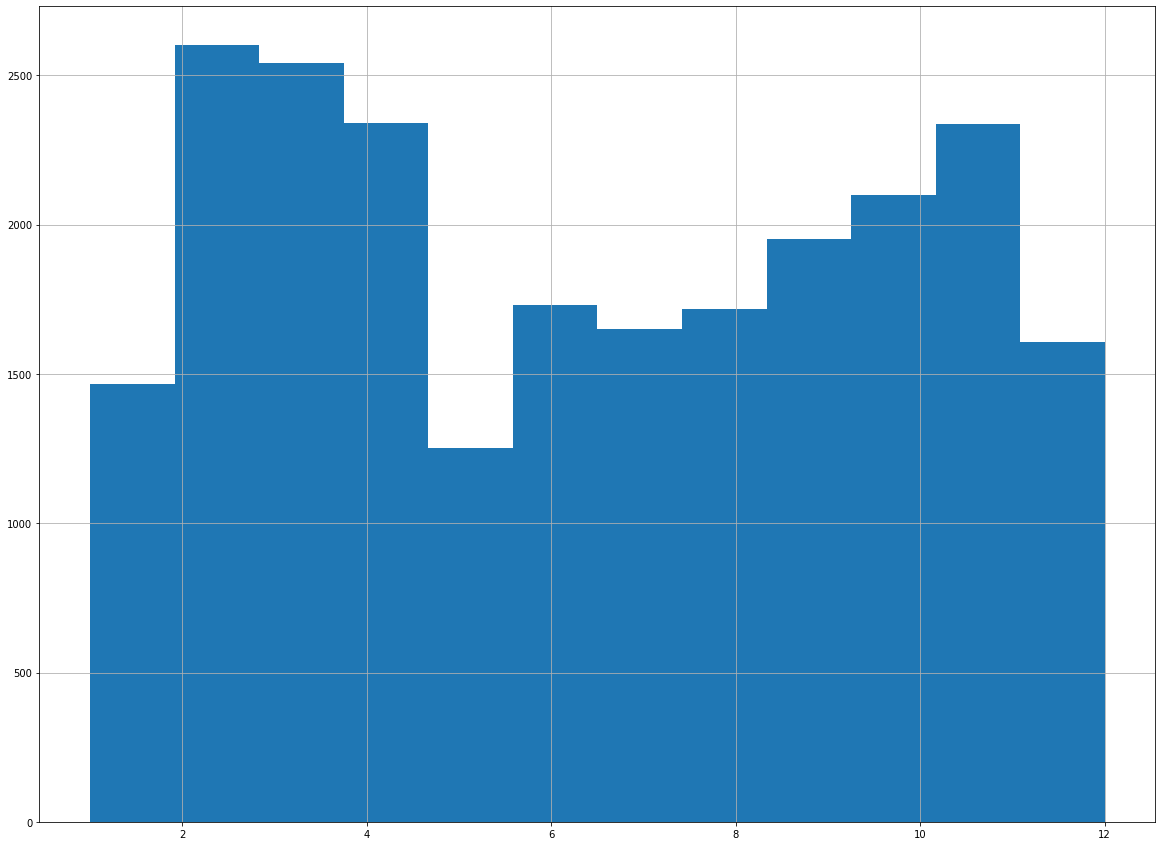

In [87]:
data['month'].hist(range = (1, 12), bins=12, figsize = (20, 15)) #строим гистограммы

Самые популярные месяцы для размещения объявления - февраль, март, апрель и ноябрь, спад - в январе и мае. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В мае не до продаж, все на огородах =)
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> =) </div>


### Изучаем скорость продажи квартир

Мы поставили заглушки для пропусков в столбце days_exposition, для анализа не будем их учитывать.

In [88]:
days_exposition_pure = data.query('days_exposition != 66666')
days_exposition_pure['days_exposition'].describe()
#data['days_exposition'].describe()

count   20199.00
mean      179.51
std       218.57
min         1.00
25%        45.00
50%        95.00
75%       229.00
max      1580.00
Name: days_exposition, dtype: float64

<AxesSubplot:>

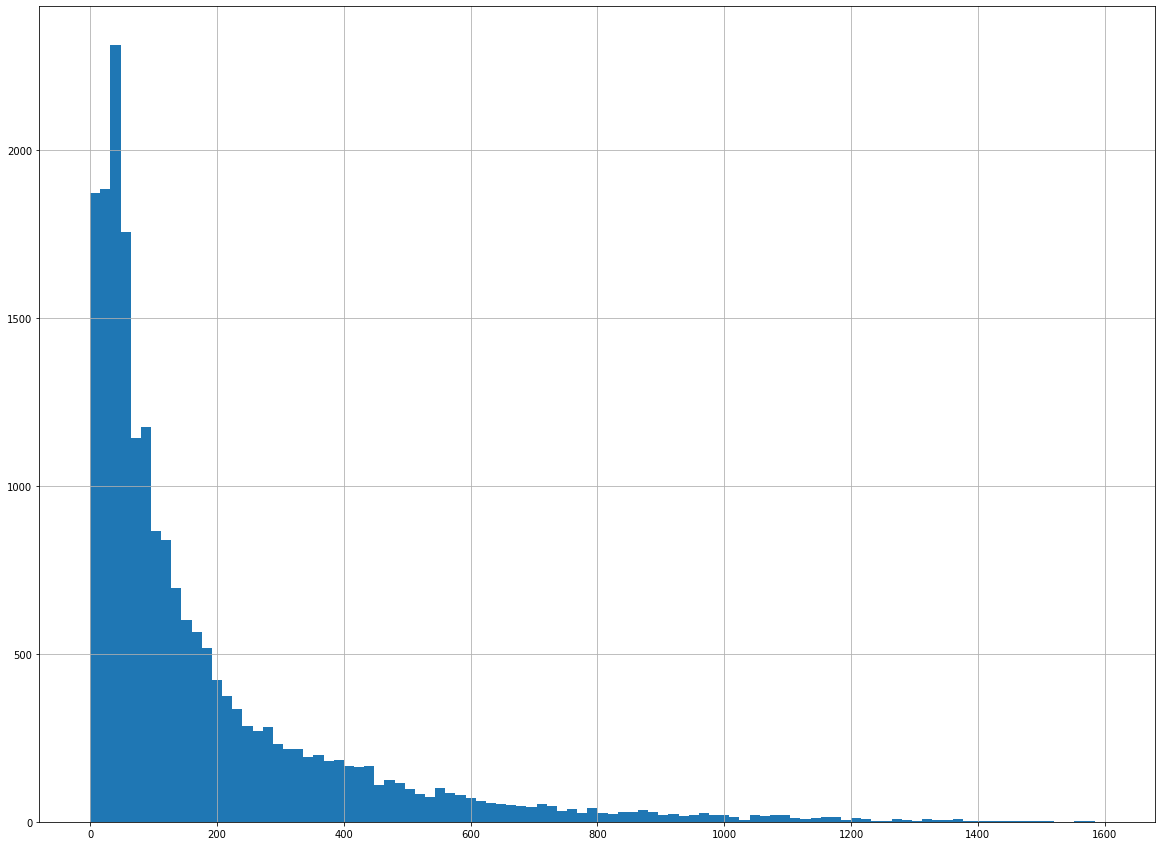

In [89]:
days_exposition_pure['days_exposition'].hist(range = (0, 1600), bins=100, figsize = (20, 15)) #строим гистограммы

<AxesSubplot:>

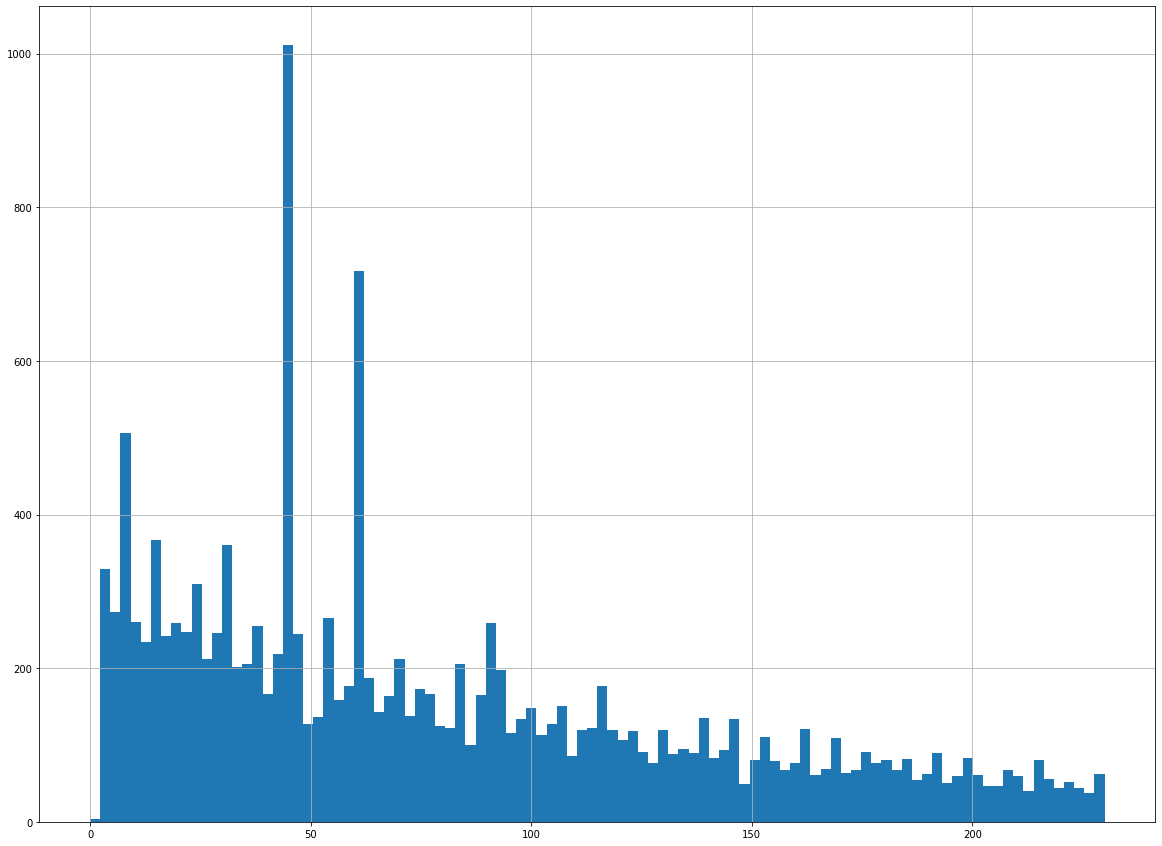

In [90]:
days_exposition_pure['days_exposition'].hist(range = (0, 230), bins=100, figsize = (20, 15)) #строим гистограммы

<AxesSubplot:>

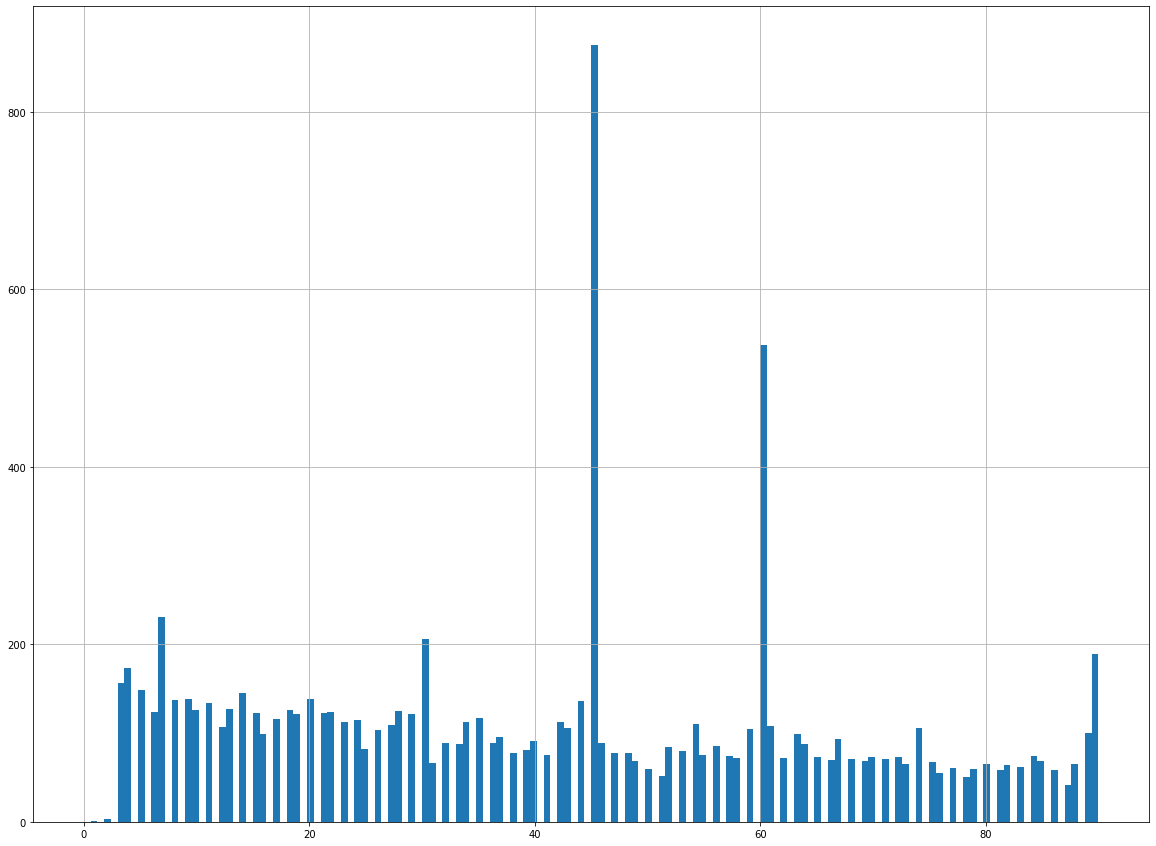

In [91]:
days_exposition_pure['days_exposition'].hist(range = (0, 90), bins=150, figsize = (20, 15)) #строим гистограммы

In [92]:
days_exposition_pure['days_exposition'].median()

95.0

In [93]:
days_exposition_pure['days_exposition'].mean()

179.51339175206692

<AxesSubplot:>

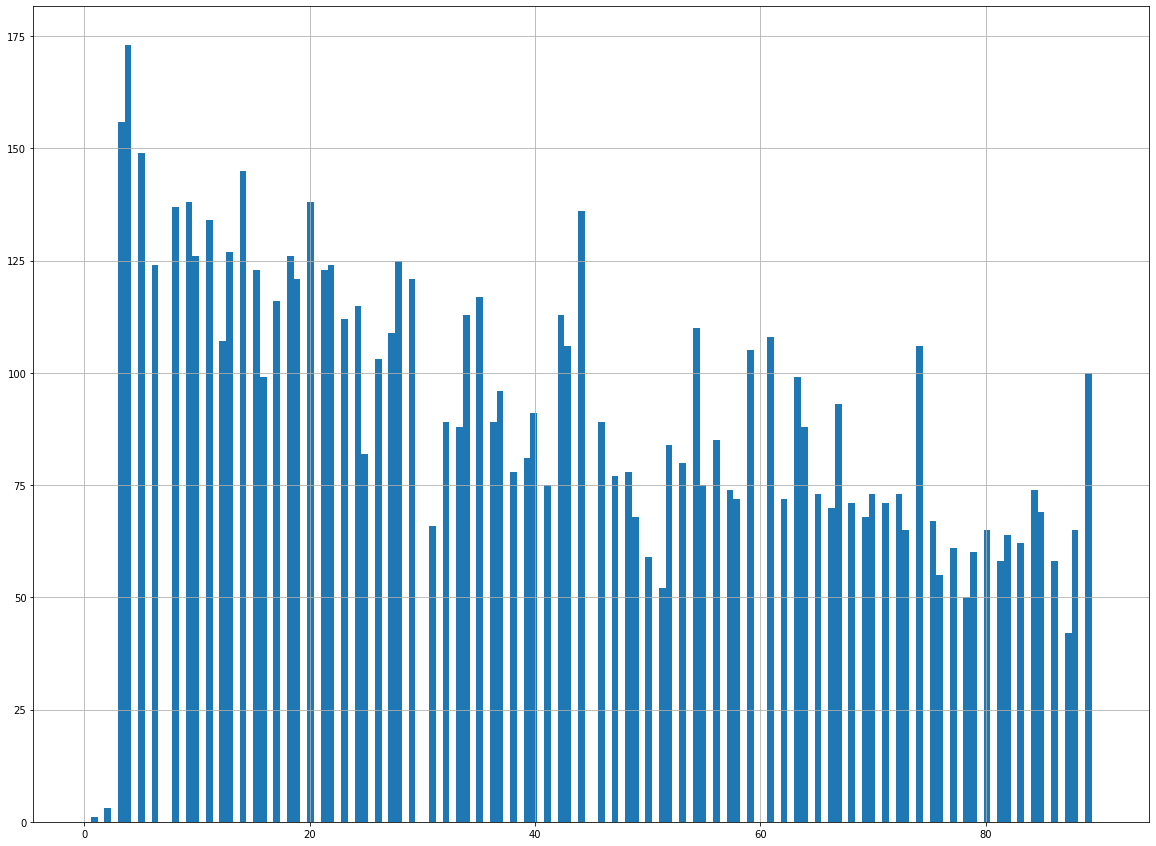

In [94]:
days_exposition_filter = data.query('days_exposition != 66666 & days_exposition != 7 & days_exposition != 30 & days_exposition != 45 & days_exposition != 60 & days_exposition != 90')
days_exposition_filter['days_exposition'].hist(range = (0, 90), bins=150, figsize = (20, 15)) #строим гистограммы

In [95]:
days_exposition_filter['days_exposition'].median()

113.0

In [96]:
days_exposition_filter['days_exposition'].mean()

194.34992566488629

In [97]:
days_exposition_filter['days_exposition'].describe()

count   18161.00
mean      194.35
std       225.62
min         1.00
25%        44.00
50%       113.00
75%       256.00
max      1580.00
Name: days_exposition, dtype: float64

#### Вывод
Показатель Q2 говорит нам, что половина всех объявлений снимается в первые 3 месяца, это можно считать быстрыми продажами.
Меньше четверти объявлений продолжает висеть спустя 8 месяцев после публикации, это можно считать долгими продажами.
Продажи свыше 2 лет можно считать аномально долгими.

Есть пики на отметках в 1 неделю, 1 месяц, 1.5 месяца, 2 месяца и 3 месяца. Учитывая 'круглые' отметки, это может быть связано с ограничениями на срок первичной публикации или с приходящими напоминаниями пользователям об актуальности объявлений (возможно, квартиры уже были проданы через другие порталы)

После удаления этих дней из анализа, среднее и медиана выросли, но не критично.
Делаем вывод, что большая часть квартир продается в первые 4 месяца после объявления.



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен
</div>

### Факторы, влияющие на стоимость

#### Общая площадь

In [98]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year,category_stage,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,другой,14
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,0.00,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,другой,0


In [99]:
data['last_price'].describe()

count      23296.00
mean     5871289.68
std      4689749.93
min       430000.00
25%      3400000.00
50%      4600000.00
75%      6650000.00
max     50000000.00
Name: last_price, dtype: float64

0.7691075563697659

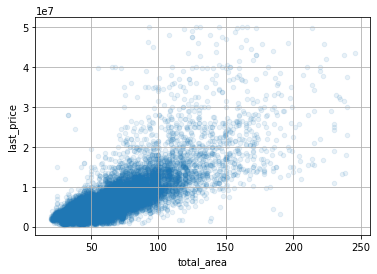

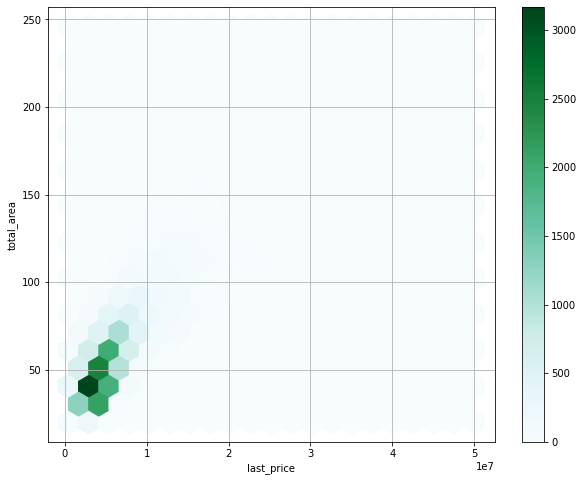

In [100]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True) 
data['total_area'].corr(data['last_price'])

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

##### Вывод
Высокая прямая корреляция, делаем вывод о прямом влиянии общей площади на стоимость квартиры.

Однако, бывают случаи как дешевых больших квартир, так и маленьких, но дорогих.

Основная масса квартир торгуется по цене менее 15 млн. руб.

Практически нет квартир с площадью свыше 125 м2 дешевле 10 млн. руб.

Чем выше площадь квартиры - тем меньше корреляция.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

#### Жилая площадь

0.6568218606363847

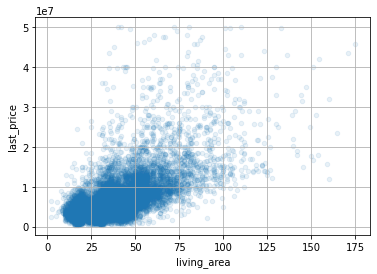

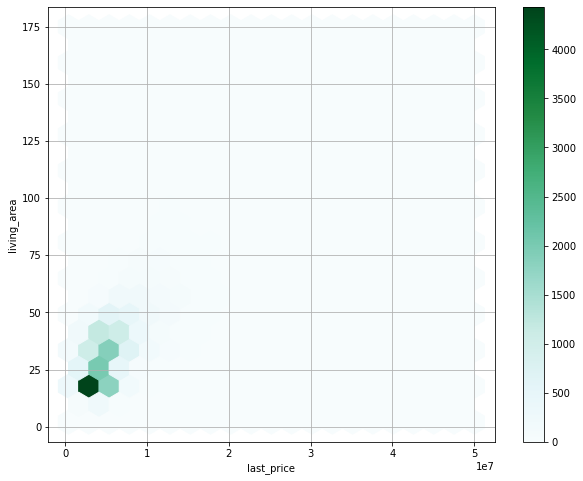

In [101]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True) 
data['living_area'].corr(data['last_price'])

##### Вывод
Прямая зависимость цены от жилой площади есть, хоть корреляция меньше, чем у общей площади.

Немало квартир с жилой площадью менее 60 м2 стоят более 20 млн. руб.

Но в основном стоимость квартир менее 60 м2 находится в пределах 15 млн. руб. 

#### Площадь кухни

0.5922762808704629

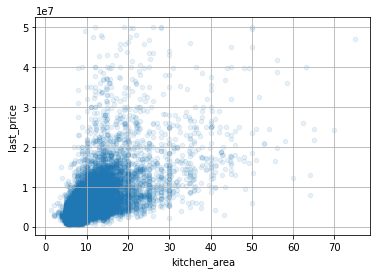

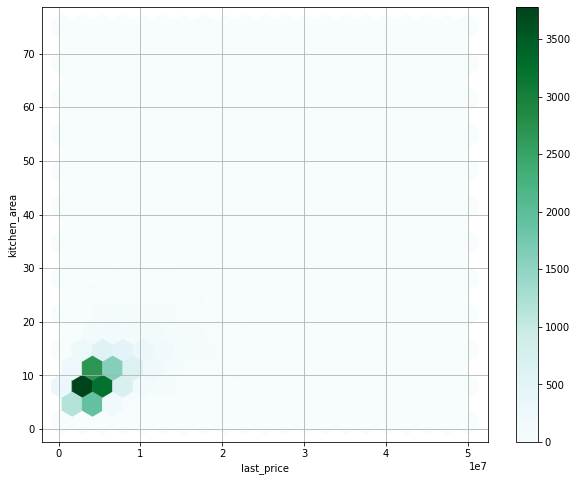

In [102]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True) 
data['kitchen_area'].corr(data['last_price'])

0.3268566195282588

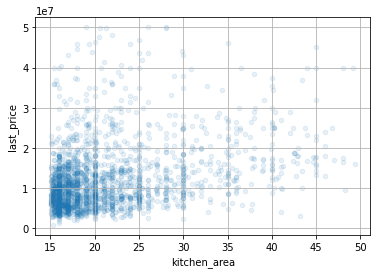

In [103]:
data_k_area_price_filter = data.query('15 < kitchen_area < 50')
data_k_area_price_filter.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 
data_k_area_price_filter['kitchen_area'].corr(data_k_area_price_filter['last_price'])

##### Вывод
Прямая зависимость цены от кухонной площади есть, но она не настолько явная как зависимость от общей площади.

Причем для кухни свыше 15 м2 корреляция сильно снижается.

Видимо, большинству людей важней, чтобы кухня не была слишком маленькой, а большой размер кухни скорее предпочтение, чем основополагающий фактор.

#### Количество комнат

In [104]:
data['rooms'].describe()

count   23296.00
mean        2.02
std         0.96
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         5.00
Name: rooms, dtype: float64

0.46101375978438136

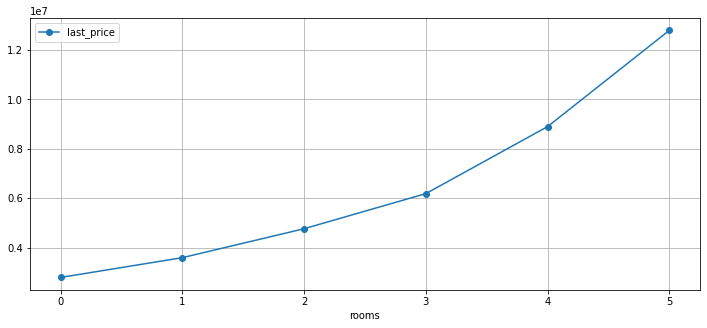

In [105]:
data.pivot_table(
    index='rooms', values='last_price', aggfunc='median').reset_index().plot(
    x='rooms', y='last_price', figsize=(12, 5), style='o-', grid=True
)
data['rooms'].corr(data['last_price'])

##### Вывод
Прямая зависимость цены от количества комнат есть, но она ниже, чем у всех вышеперечисленных параметров.


#### Тип этажа

<AxesSubplot:xlabel='category_stage'>

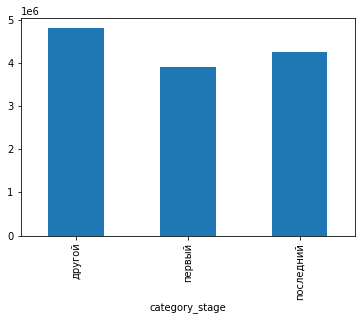

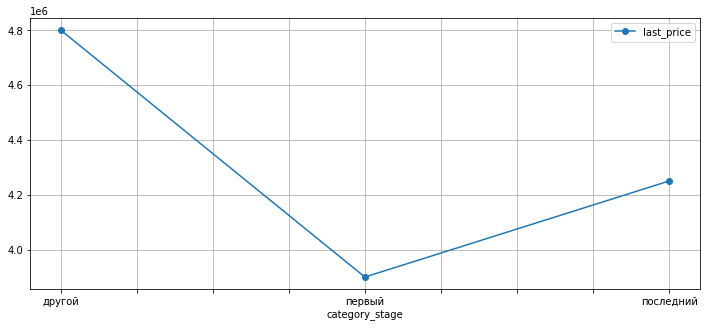

In [106]:
data.groupby('category_stage')['last_price'].median().plot.bar()
data.pivot_table(
    index='category_stage', values='last_price', aggfunc='median').reset_index().plot(
    x='category_stage', y='last_price', figsize=(12, 5), style='o-', grid=True
)

##### Вывод
Наименьшую ценность представляет первый этаж.
Квартиры на последнем этаже ценятся меньше, чем квартиры в 'середине' доиа
Корреляция незначительна.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

#### День недели размещения

-0.013950526315707444

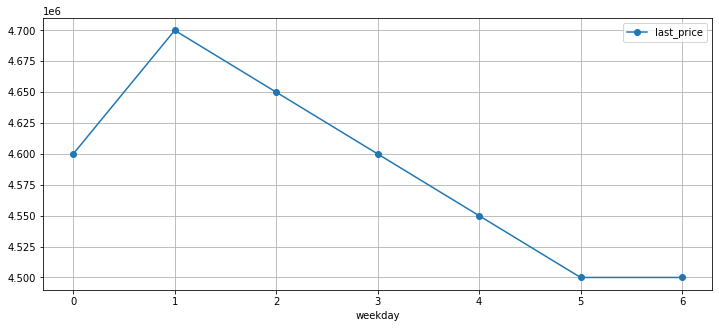

In [107]:
data.pivot_table(
    index='weekday', values='last_price', aggfunc='median').reset_index().plot(
    x='weekday', y='last_price', figsize=(12, 5), style='o-', grid=True
)
data['weekday'].corr(data['last_price'])

###### Вывод
Коэффициент корреляции практически равен 0, однако глядя на график отмечаем, что во вторник чаще размещают объявления на продажу дорогих квартир, а на выходных - дешевых.

#### Месяц размещения

0.003429467340752558

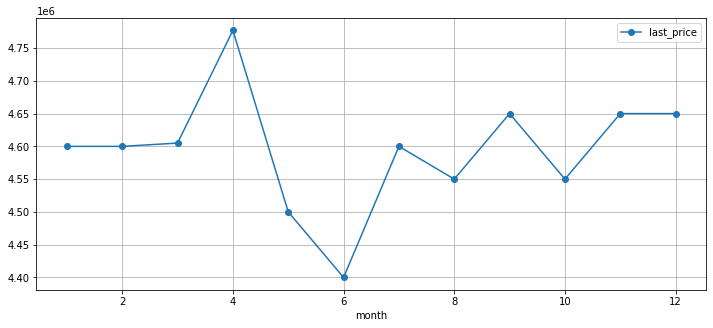

In [108]:
data.pivot_table(
    index='month', values='last_price', aggfunc='median').reset_index().plot(
    x='month', y='last_price', figsize=(12, 5), style='o-', grid=True
)
data['month'].corr(data['last_price'])

##### Вывод
Коэффициент корреляции практически равен 0, однако глядя на график отмечаем, что в апреле средняя цена квартиры, выставленной на продажу, немного выше, а в июне - немного ниже.


#### Год размещения

-0.04578243292108271

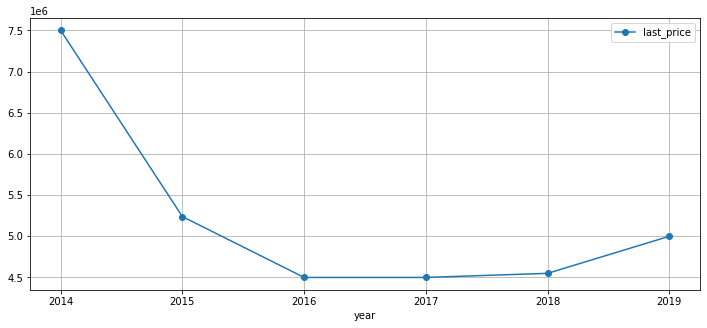

In [109]:
data.pivot_table(
    index='year', values='last_price', aggfunc='median').reset_index().plot(
    x='year', y='last_price', figsize=(12, 5), style='o-', grid=True
)
data['year'].corr(data['last_price'])

-0.08885782866337745

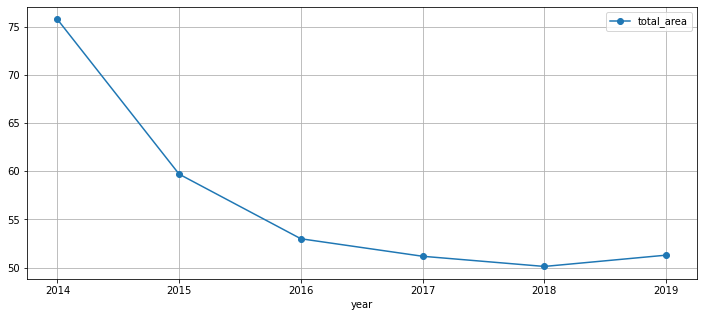

In [115]:
data.pivot_table(
    index='year', values='total_area', aggfunc='median').reset_index().plot(
    x='year', y='total_area', figsize=(12, 5), style='o-', grid=True
)
data['year'].corr(data['total_area'])

##### Вывод
Коэффициент корреляции практически равен 0, однако глядя на график зависимости цены от года отмечаем, что в 2014 году средняя цена квартиры, выставленной на продажу существенно выше, чем в последующие годы. 

Но если посмотреть на график зависимости общей площади от цены, все встает на свои места. Мы видим, что он практически полностью повторяет график зависимости цены от года. 

С 2014 года стала падать площадь продаваемых квартир и соотвественно стала падать стоимость, у которой прямая корреляция с общей площадью.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Принял, понял и поправил. Не сообразил, действительно)</div>


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный инсайд для заказчика) Молодец
</div>

#### Вывод
Максимальное влияние на формирование цены из вышерассмотренных факторов оказывает общая площадь.

### Средняя цена за 1 м2 площади

In [110]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m2,weekday,month,year,category_stage,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,66666,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558,92785.71,3,8,2015,другой,14
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121,100000.00,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок янино-1,NaN,0.00,NaN,NaN,NaN,NaN,55,95065.79,0,9,2018,другой,0


Находим населенные пункты с наибольшим количество объявлений

In [116]:
data_name_price1m2_filter = data.pivot_table(
    index=['locality_name'], values='price_1m2', aggfunc=['count', 'median']).reset_index().sort_values(
    by=[('count', 'price_1m2')], ascending=False).head(10)
data_name_price1m2_filter.sort_values(by=[('median', 'price_1m2')], ascending=False).head(10)

,locality_name,count,median
,,price_1m2,price_1m2
300,санкт-петербург,15387,104603.17
294,пушкин,365,100000.00
43,деревня кудрово,298,91930.23
216,поселок парголово,326,91780.22
205,поселок мурино,555,85714.29
289,поселок шушары,439,76829.27
119,колпино,337,74722.22
6,гатчина,307,67796.61
3,всеволожск,397,65789.47


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Принял, поправил</div>


#### Вывод
Самая высокая цена за м2 среди населенных пунктов с наибольшим количеством объявлений в Санкт-Петербурге, самая низкая - в Выборге.

### Средняя цена за 1 км до центра в Санкт-Петербурге

-0.3503401823520035

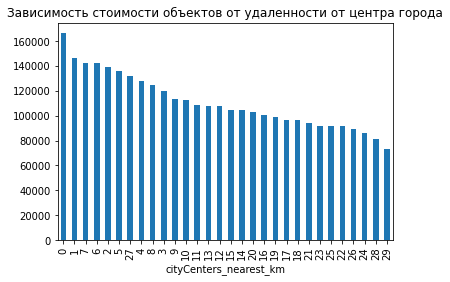

In [114]:
data_Piter = data.query('locality_name == "санкт-петербург"')
data_Piter.groupby('cityCenters_nearest_km')['price_1m2'].mean().sort_values(ascending=False)\
    .plot(kind='bar', title = 'Зависимость стоимости объектов от удаленности от центра города');
data_Piter['price_1m2'].corr(data_Piter['cityCenters_nearest_km'])

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

#### Вывод
Мы видим обратную корреляцию: чем меньше расстояние до центра, тем выше цена за 1 м2

## Общий вывод

    Перед основным этапом исследования была проведена предобратка данных. В ходе нее мы удалили строки с пропусками в столбцах 'name' и 'genre', поставили заглушки для анализа в столбцах 'year_of_release', 'critic_score' и 'user_score', переформатировали тип данных в столбцах 'first_day_exposition', 'last_price', 'floors_total', 'days_exposition' и 'balcony', устранили неявные дубликаты в столбце 'platform', убрали аномалии и избавились от выбросов в столбце 'year_of_release', 'last_price', 'total_area' и 'rooms', провели дополнительную категоризацию для значений столбца 'floor', рассчитали значений и добавили новые столбцы 'price_1m2', 'weekday', 'month', 'year', 'category_stage' и 'cityCenters_nearest_km', построили первоначальные гистограммы.

    
    Основной этап исследования включал в себя исследовательский анализ отфильтрованных данных, определение скорости продаж квартир, выявление влияния различных факторов на стоимость квартир, расчет средней цены 1 м2 в каждом из населенных пунктов с самым большим количеством объявлений.  В ходе него мы вывели описание для каждого столбца с данными, определили коэффициенты корреляции, построили сводные таблицы, сделали графическое отображение результатов.
    
    
    Большая часть объявлений снимается в первые 4 месяца после размещения, что можно считать быстрыми продажами, а квартиры, не продающиеся больше полутора лет - аномально долгими. Также мы выяснили, что у сервиса есть ограничения или условия на размещение объявлений, так как большое количество объявлений было снято в круглые даты: неделю, месяц, 1,5 месяца, 2 месяца, 3 месяца.
    
    
    Основная часть квартир, выставленных на продажу, находится в ценовом диапазоне от 2,5 до 7 млн руб; имеют общую площадь от 30 до 60 м2; являются 2-х, 3-х и 4-хкомнатными с высотой потолков 2,3 - 2,8 м; располагаются ниже 6 этажа, не на первом и не последнем этаже в 5 и 9-этажках; находятся в 10-17 км от центра города, в 10-35 км от аэропорта и не далее, чем в 700 метрах от парковой зоны; объявления чаще всего выставляются в феврале, марте, апреле и ноябре, в будние дни, а реже - по выходным, в январе и мае.
    
    Основным фактором, влияющим на стоимость квартир, является величина общей площади; в меньшей степени влияют такие факторы, как жилая площадь, площадь кухни, количество комнат; расположение квартиры на первои и последнем этаже снижает ее стоимость; день недели и месяц размещения объявления практически не влияют на стоимость объекта; с 2014 года стоимость жилья упала вплоть до 2018 года, начиная с которого опять начался рост.
    
    Также в ходе анализа мы выяснили, что среди населенных пунктов с наибольшим количеством объявлений, средняя цена за 1 м2 площади недвижимости выше всего в Санкт-Петербурге, причем чем ближе к центру города, тем дороже квартира; населенным пунктом с самым дешевым жильем оказался Выборг.
    
        Результаты отражены в таблицах, представленных ниже.

    
    
   

,locality_name,count,mean
,,price_1m2,price_1m2
300,санкт-петербург,15387,112305.65
294,пушкин,365,103176.28
43,деревня кудрово,298,92481.85
216,поселок парголово,326,90332.26
205,поселок мурино,555,85678.49
289,поселок шушары,439,78655.59
119,колпино,337,75333.30
6,гатчина,307,68746.15
3,всеволожск,397,68682.57


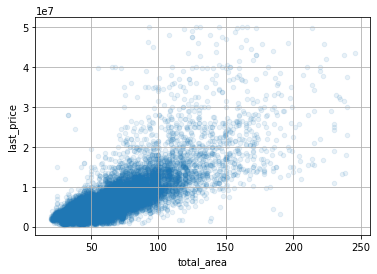

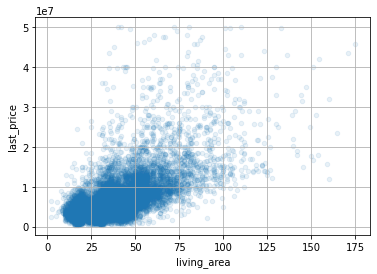

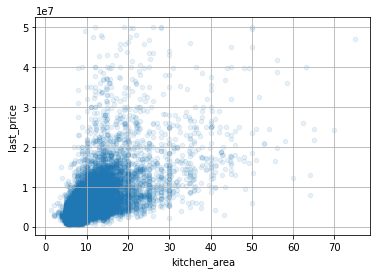

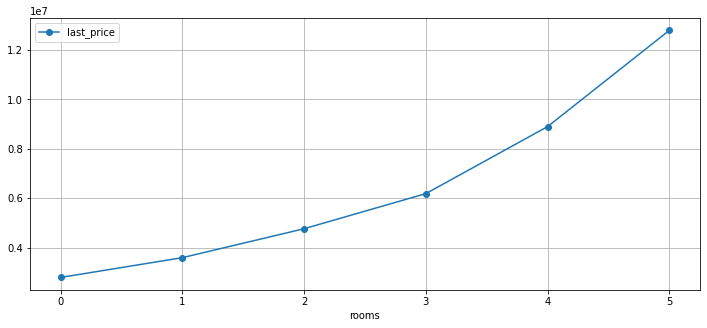

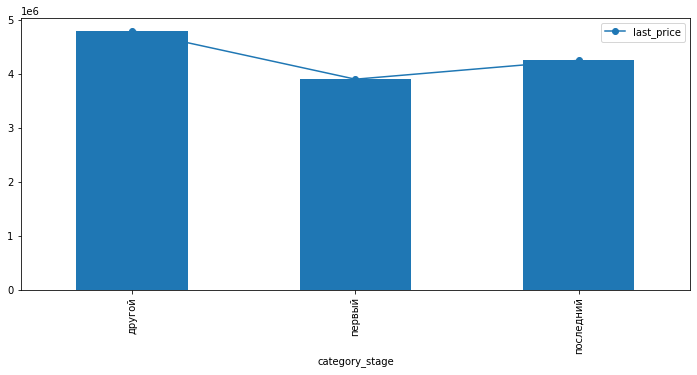

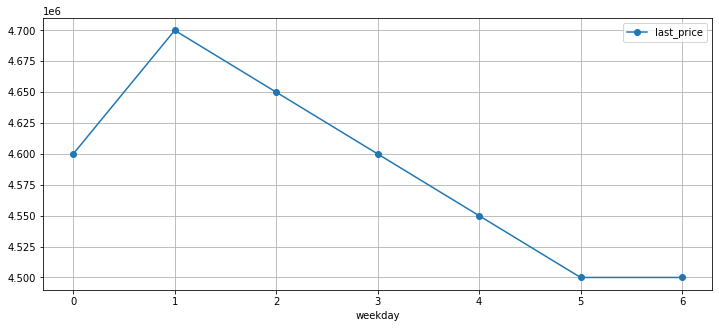

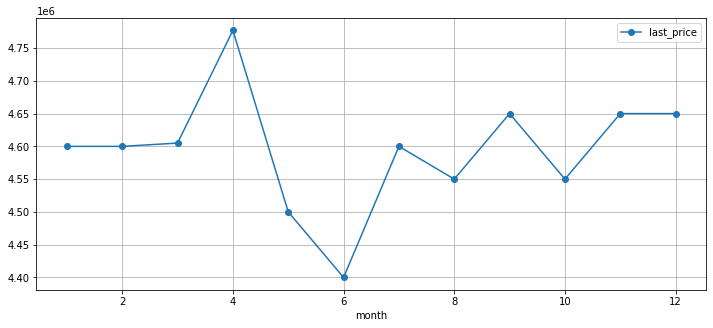

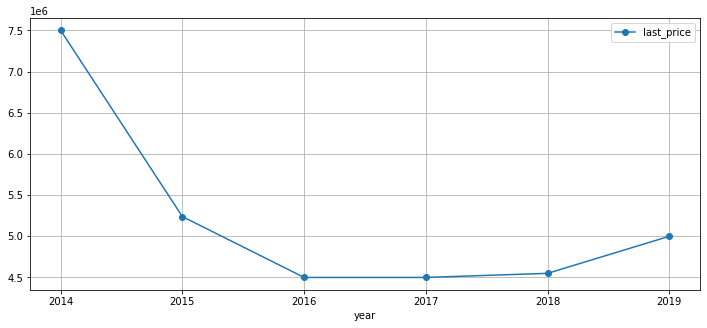

In [113]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 

data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 

data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1, grid=True) 

data.pivot_table(
    index='rooms', values='last_price', aggfunc='median').reset_index().plot(
    x='rooms', y='last_price', figsize=(12, 5), style='o-', grid=True
)


data.pivot_table(
    index='category_stage', values='last_price', aggfunc='median').reset_index().plot(
    x='category_stage', y='last_price', figsize=(12, 5), style='o-', grid=True
)
data.groupby('category_stage')['last_price'].median().plot.bar()

data.pivot_table(
    index='weekday', values='last_price', aggfunc='median').reset_index().plot(
    x='weekday', y='last_price', figsize=(12, 5), style='o-', grid=True
)

data.pivot_table(
    index='month', values='last_price', aggfunc='median').reset_index().plot(
    x='month', y='last_price', figsize=(12, 5), style='o-', grid=True
)

data.pivot_table(
    index='year', values='last_price', aggfunc='median').reset_index().plot(
    x='year', y='last_price', figsize=(12, 5), style='o-', grid=True
)

data_name_price1m2_filter.sort_values(by=[('mean', 'price_1m2')], ascending=False).head(10)


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-info"><b>Комментарии студента:</b> Большое спасибо за комментарии и оперативную работу=) Поддержка сейчас совсем не лишняя) Можно было бы причесать работу получше, но я немного опаздываю по срокам, боюсь не успеть к 25. 
    
Удачи и всего наилучшего! Надеюсь, на следующих проектах встретимся)
    
ПС. После возврата с ревью стала выходить ошибка Юпитера "Операция сохранения прошла успешно, но блокнот, похоже, недействителен. Ошибка проверки:". Надеюсь, это не помешает ревью. </div>


<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__

    
Спасибо тебе за обратную связь и крутой проект ^^ Рад, что понравилось ревью) По поводу ошибки - это из-за скриншота, который вставил в самом начале. Если убрать - ошибки не будет    
    
---    

В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод